In [1]:
# %%

In [2]:
import sys
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
r = re.compile(r"(\w+)\(([a-z0-9%]+)\), cnt : (\d+)")
lev_r = re.compile(r"lev\[\d+\] : (\d+)")
def analyze(filename):
    with open(filename) as f:
        arr = []
        while True:
            line = f.readline()
            if not line:
                break
            for name, percent, cnt in r.findall(line):
                if name in "MLfQ":
                    levs = lev_r.findall(line)
                    if levs:
                        arr.append((name, percent, 20, int(cnt), *levs))           
                else:
                    arr.append((name, "", int(percent[:-1]), int(cnt), 0, 0, 0))

        df = pd.DataFrame(arr, columns=["name", "type", "percent", "cnt", "lev0", "lev1", "lev2"])
        df["measured percent"] = df["cnt"] / df["cnt"].sum() * 100
        grouped_cnt_sum = df.groupby("name")["cnt"].sum()
        df2 = pd.merge(df, grouped_cnt_sum, "left", left_on = "name", right_on = "name")
        df["relative percent"] = df2["cnt_x"] / df2["cnt_y"] * 100
        df["z score"] = (df["measured percent"] - df["measured percent"].mean()) / df["measured percent"].std()
        df.sort_values(by=["name", "cnt"], inplace=True)
        return filename, df, grouped_cnt_sum

In [4]:
def get_workload(workload_num):
    prefix = f"scheduler_test_result_workload{workload_num}"
    logs = []
    for num in range(5):
        filename = f"{prefix}_{num:02}.txt"
        logs.append(analyze(filename))
    return logs

In [5]:
def plot_workload(workload_num = 0):
    logs = get_workload(workload_num)
    plt.figure(figsize = (50, 70))
    for idx, (filename, df, group_cnt) in enumerate(logs):
        plt.title(filename)
        ax = plt.subplot(3, 2, idx+1)
        labels = df["name"] + " " + df["percent"].astype(str) + "%"
        ax.pie(df["measured percent"], textprops = {"fontsize": "x-large"}, labels=df["measured percent"].round(2).astype(str) + "%", labeldistance=0.8)
        ax.legend(labels, loc="center right", bbox_to_anchor=(1, 0.5))
    plt.show()

In [6]:
def print_workload(workload_num = 0):
    logs = get_workload(workload_num)

    for idx, (filename, df, group_cnt) in enumerate(logs):
        print(idx)
        print(df)
        print(group_cnt / group_cnt.sum() * 100)

----------0----------


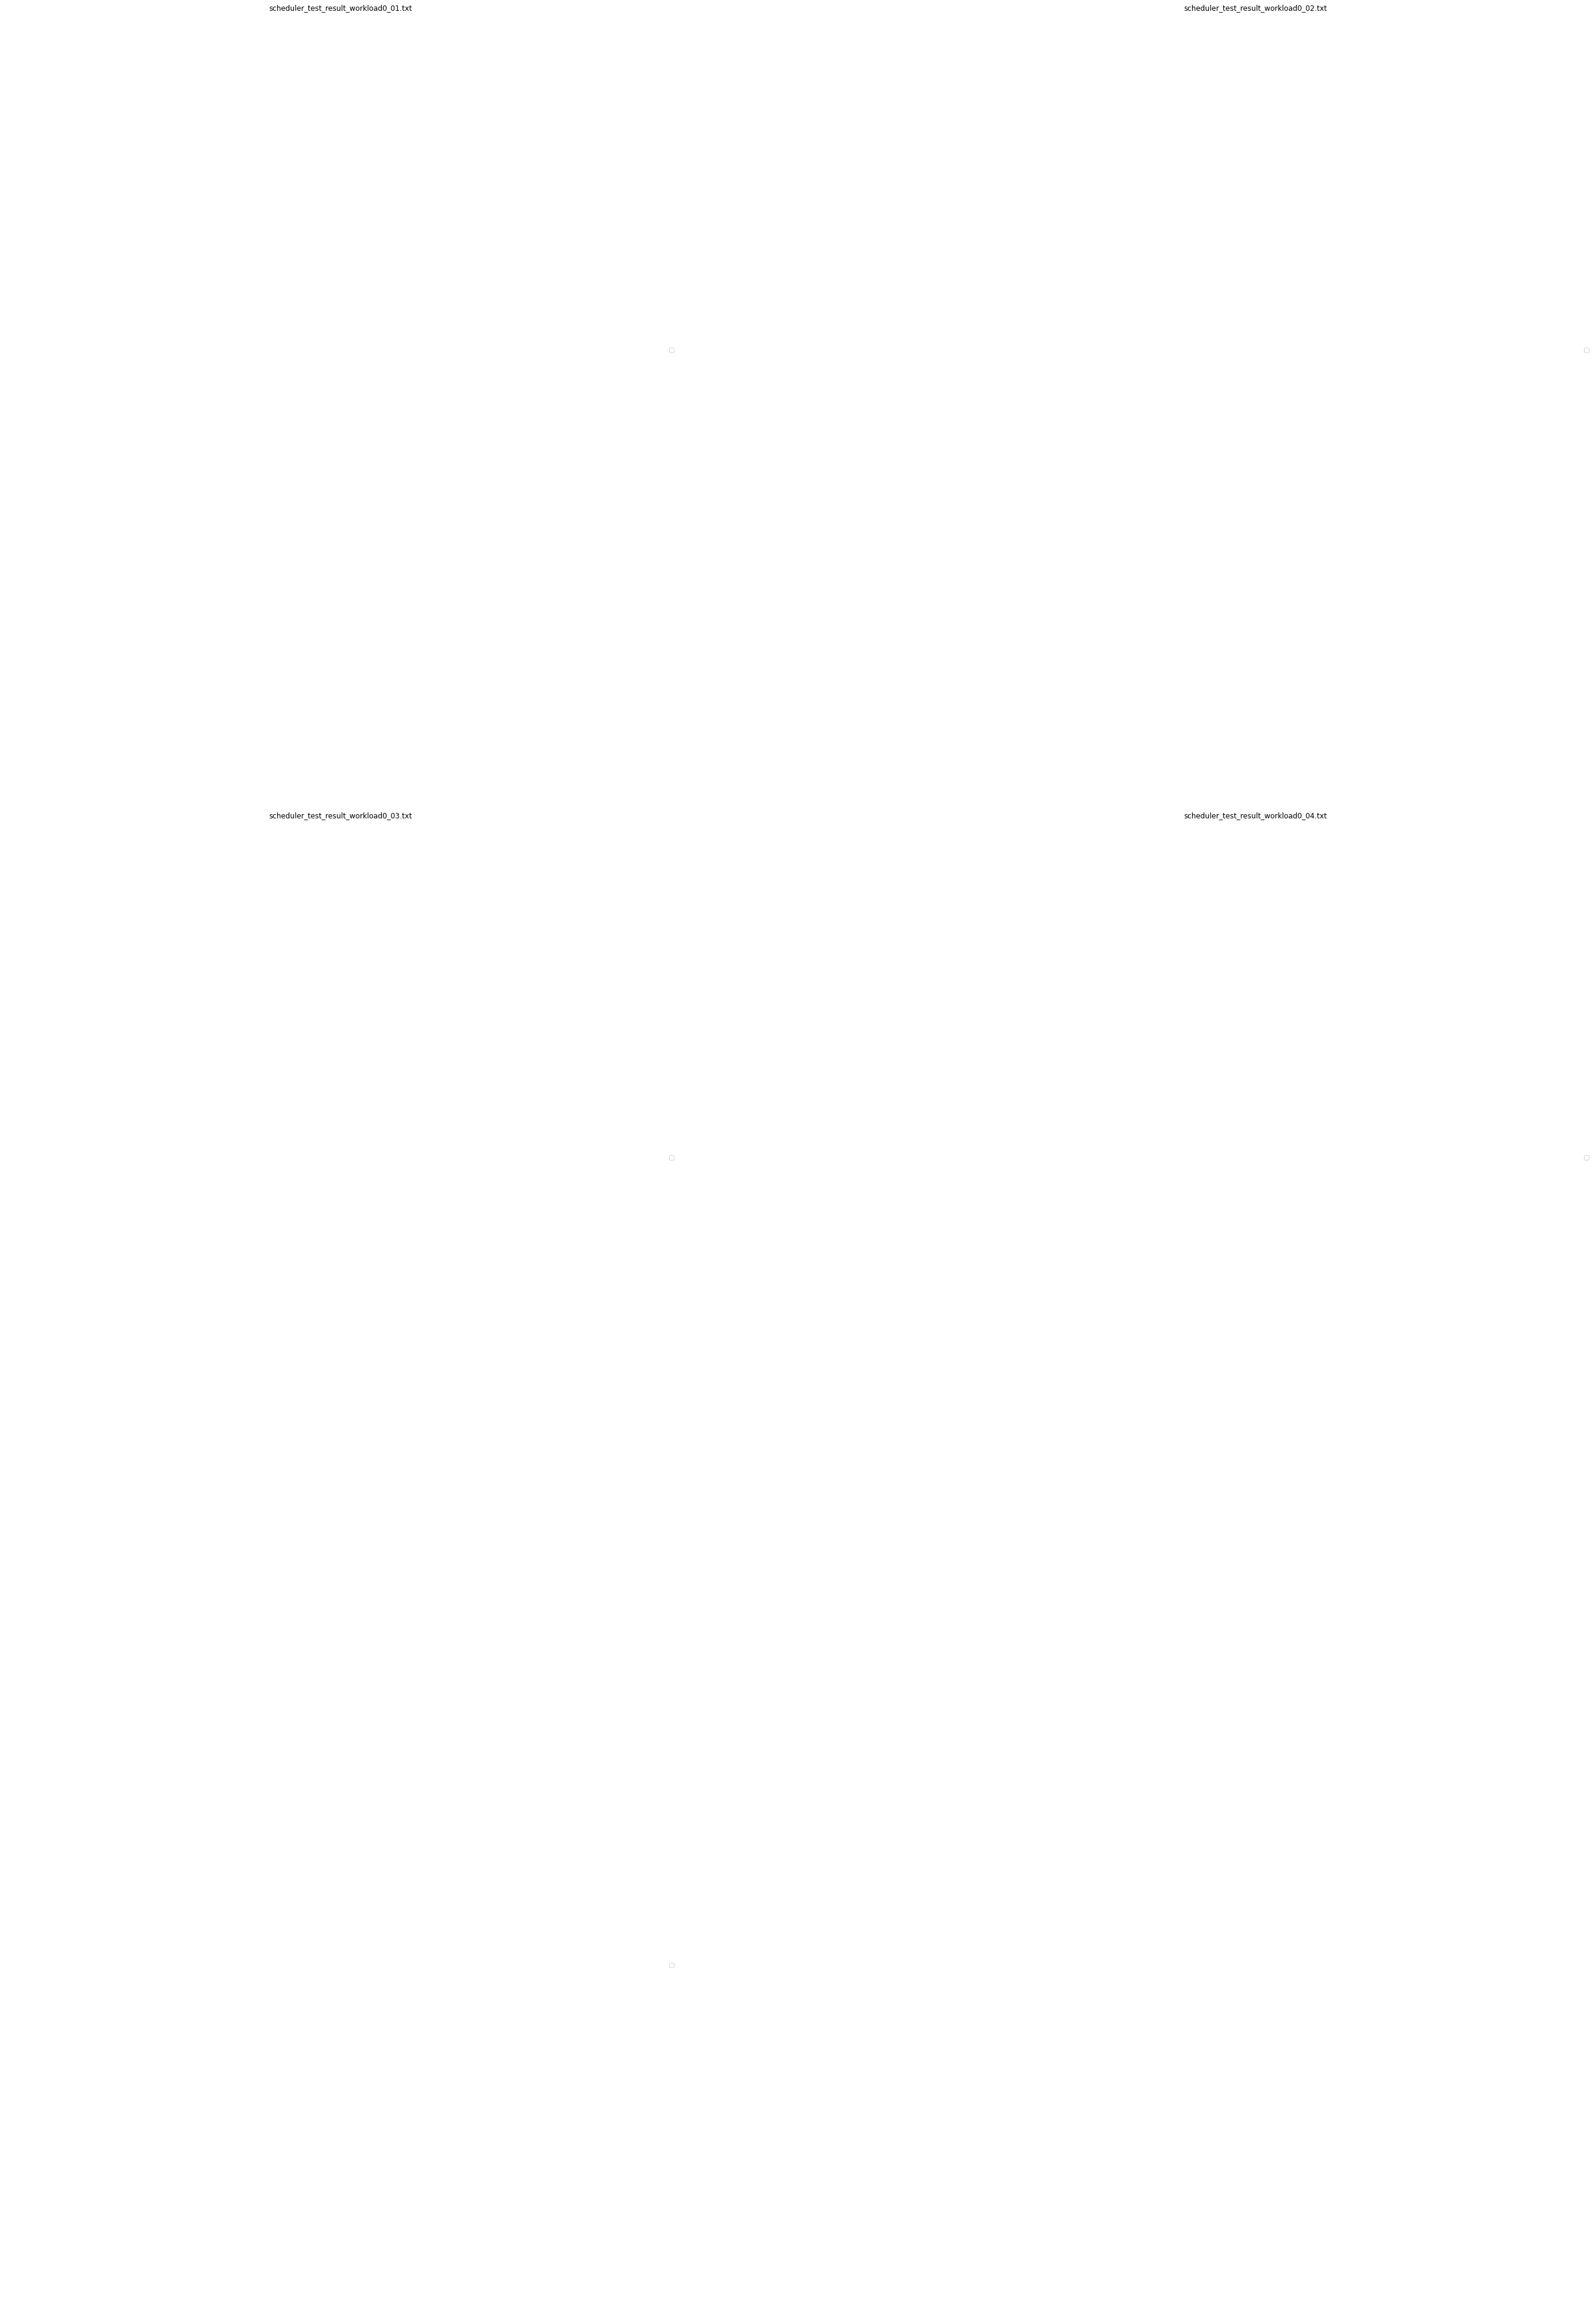

----------1----------


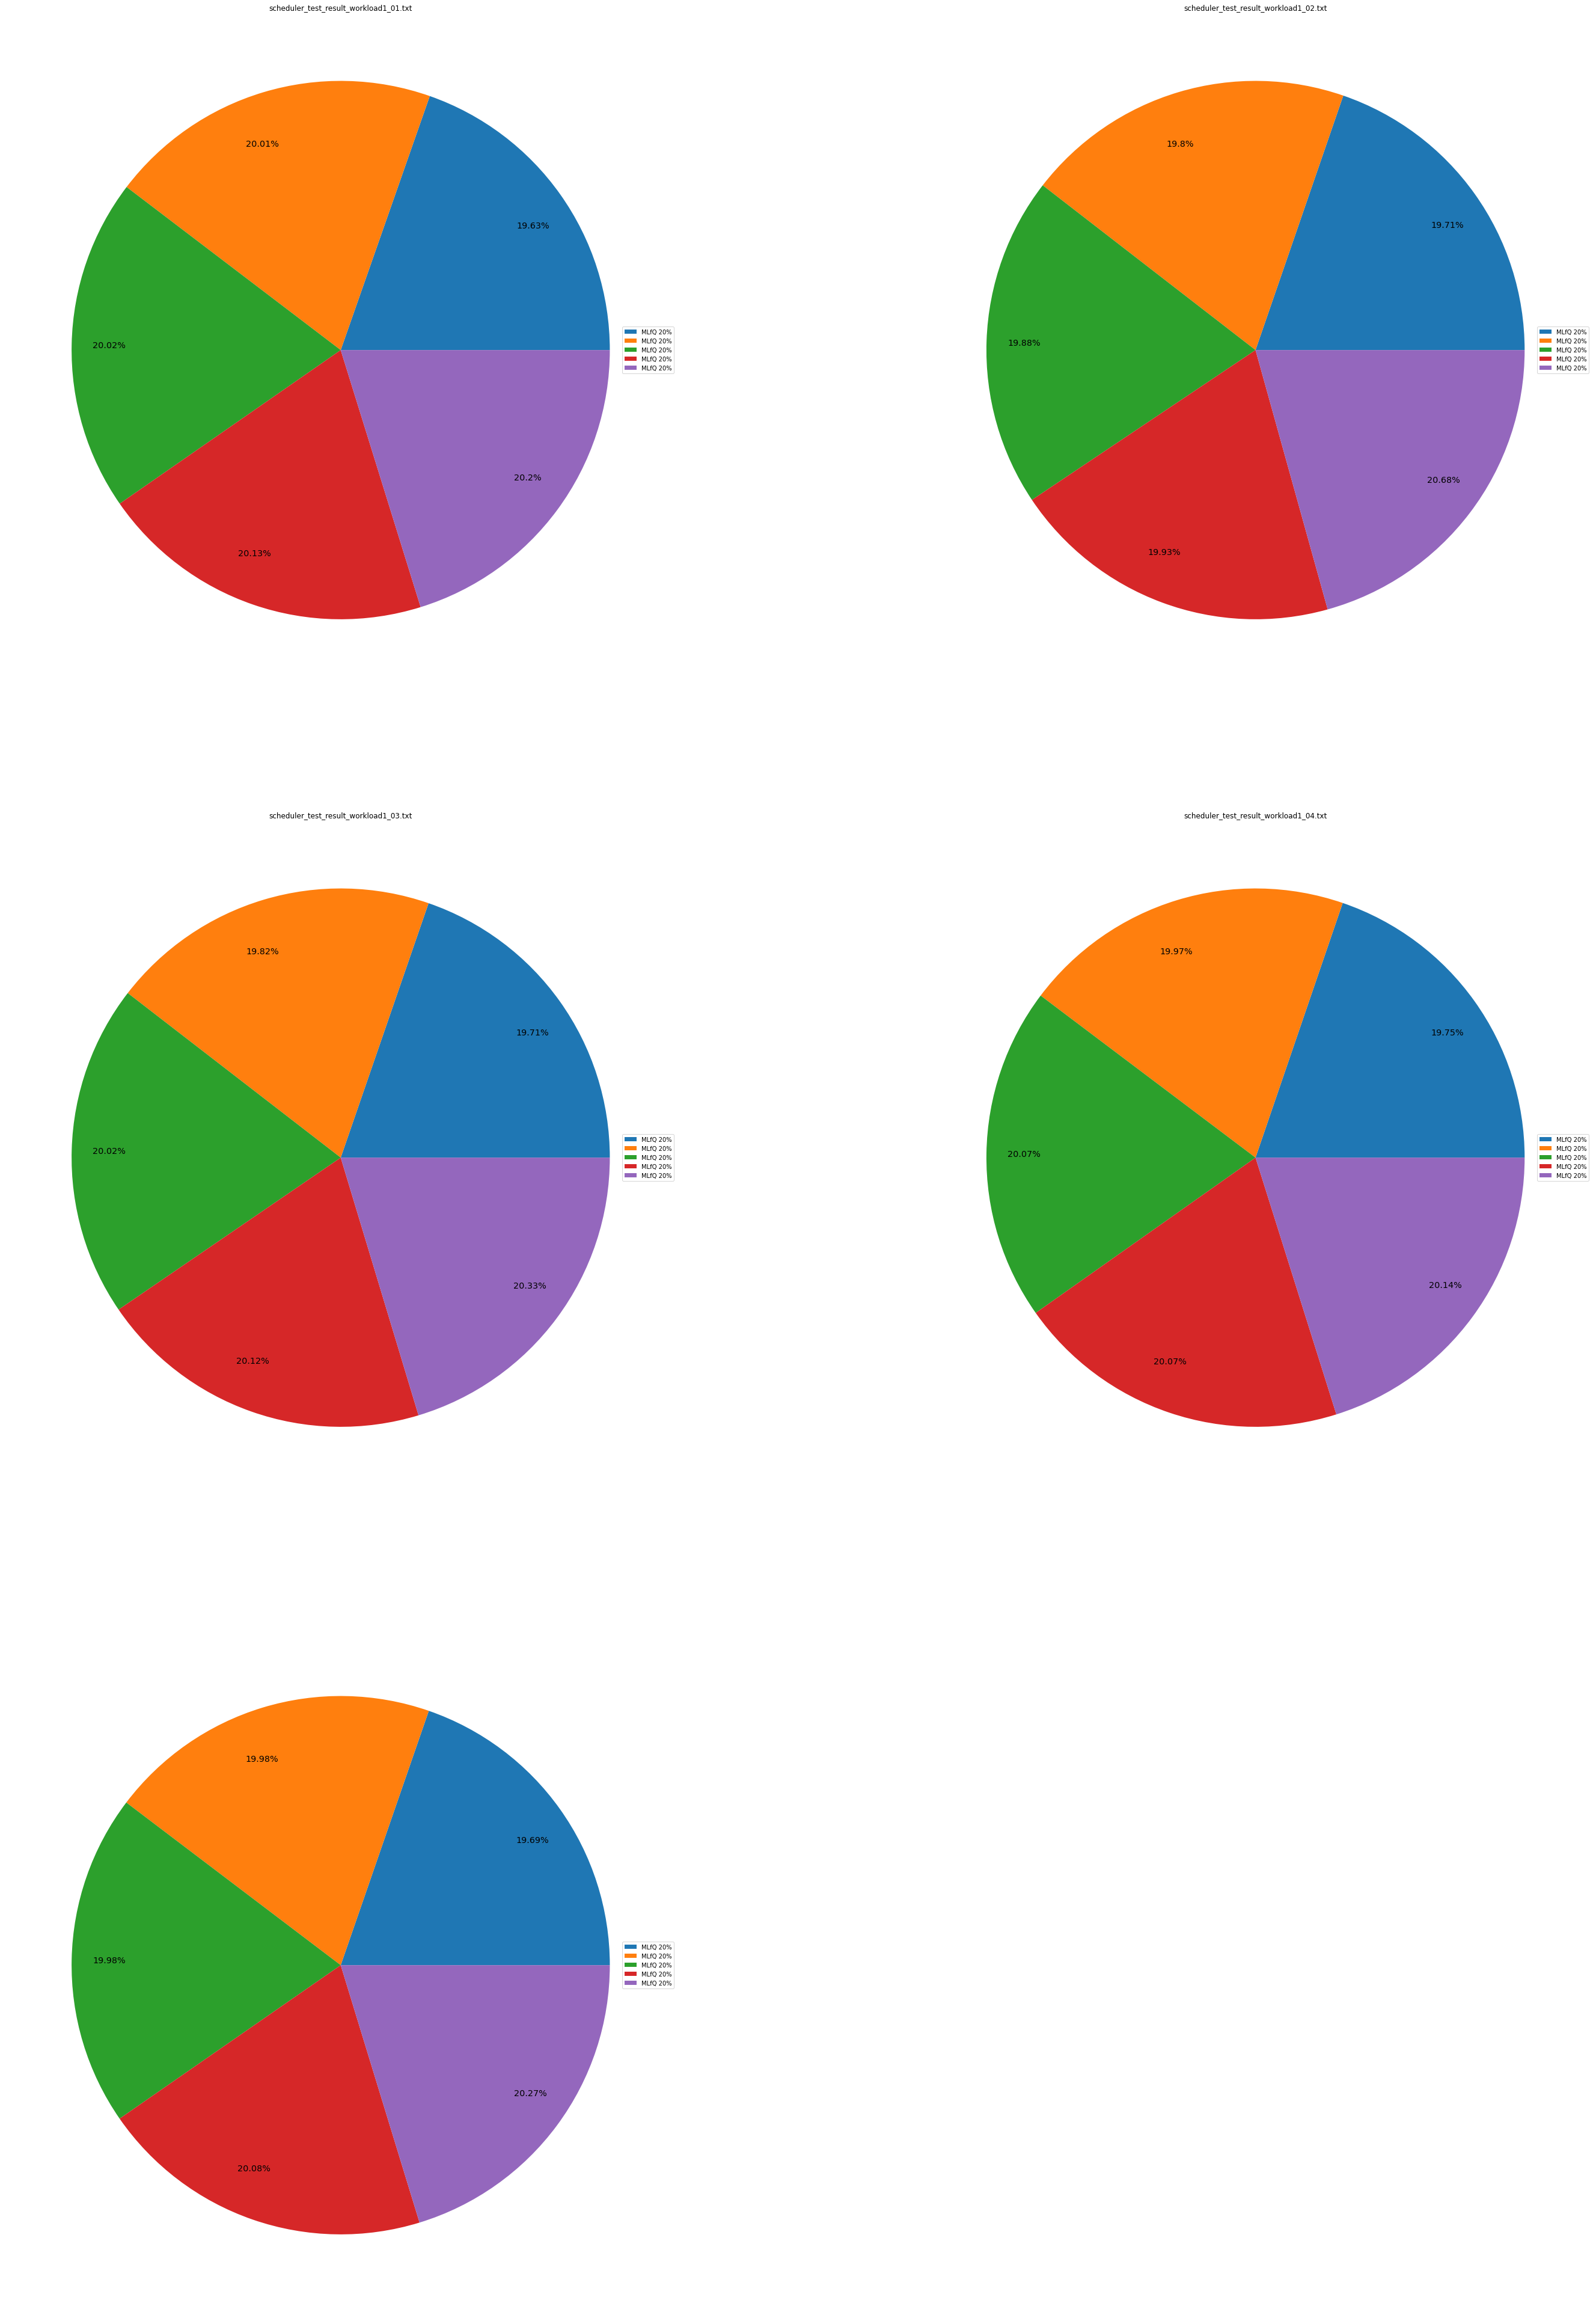

----------2----------


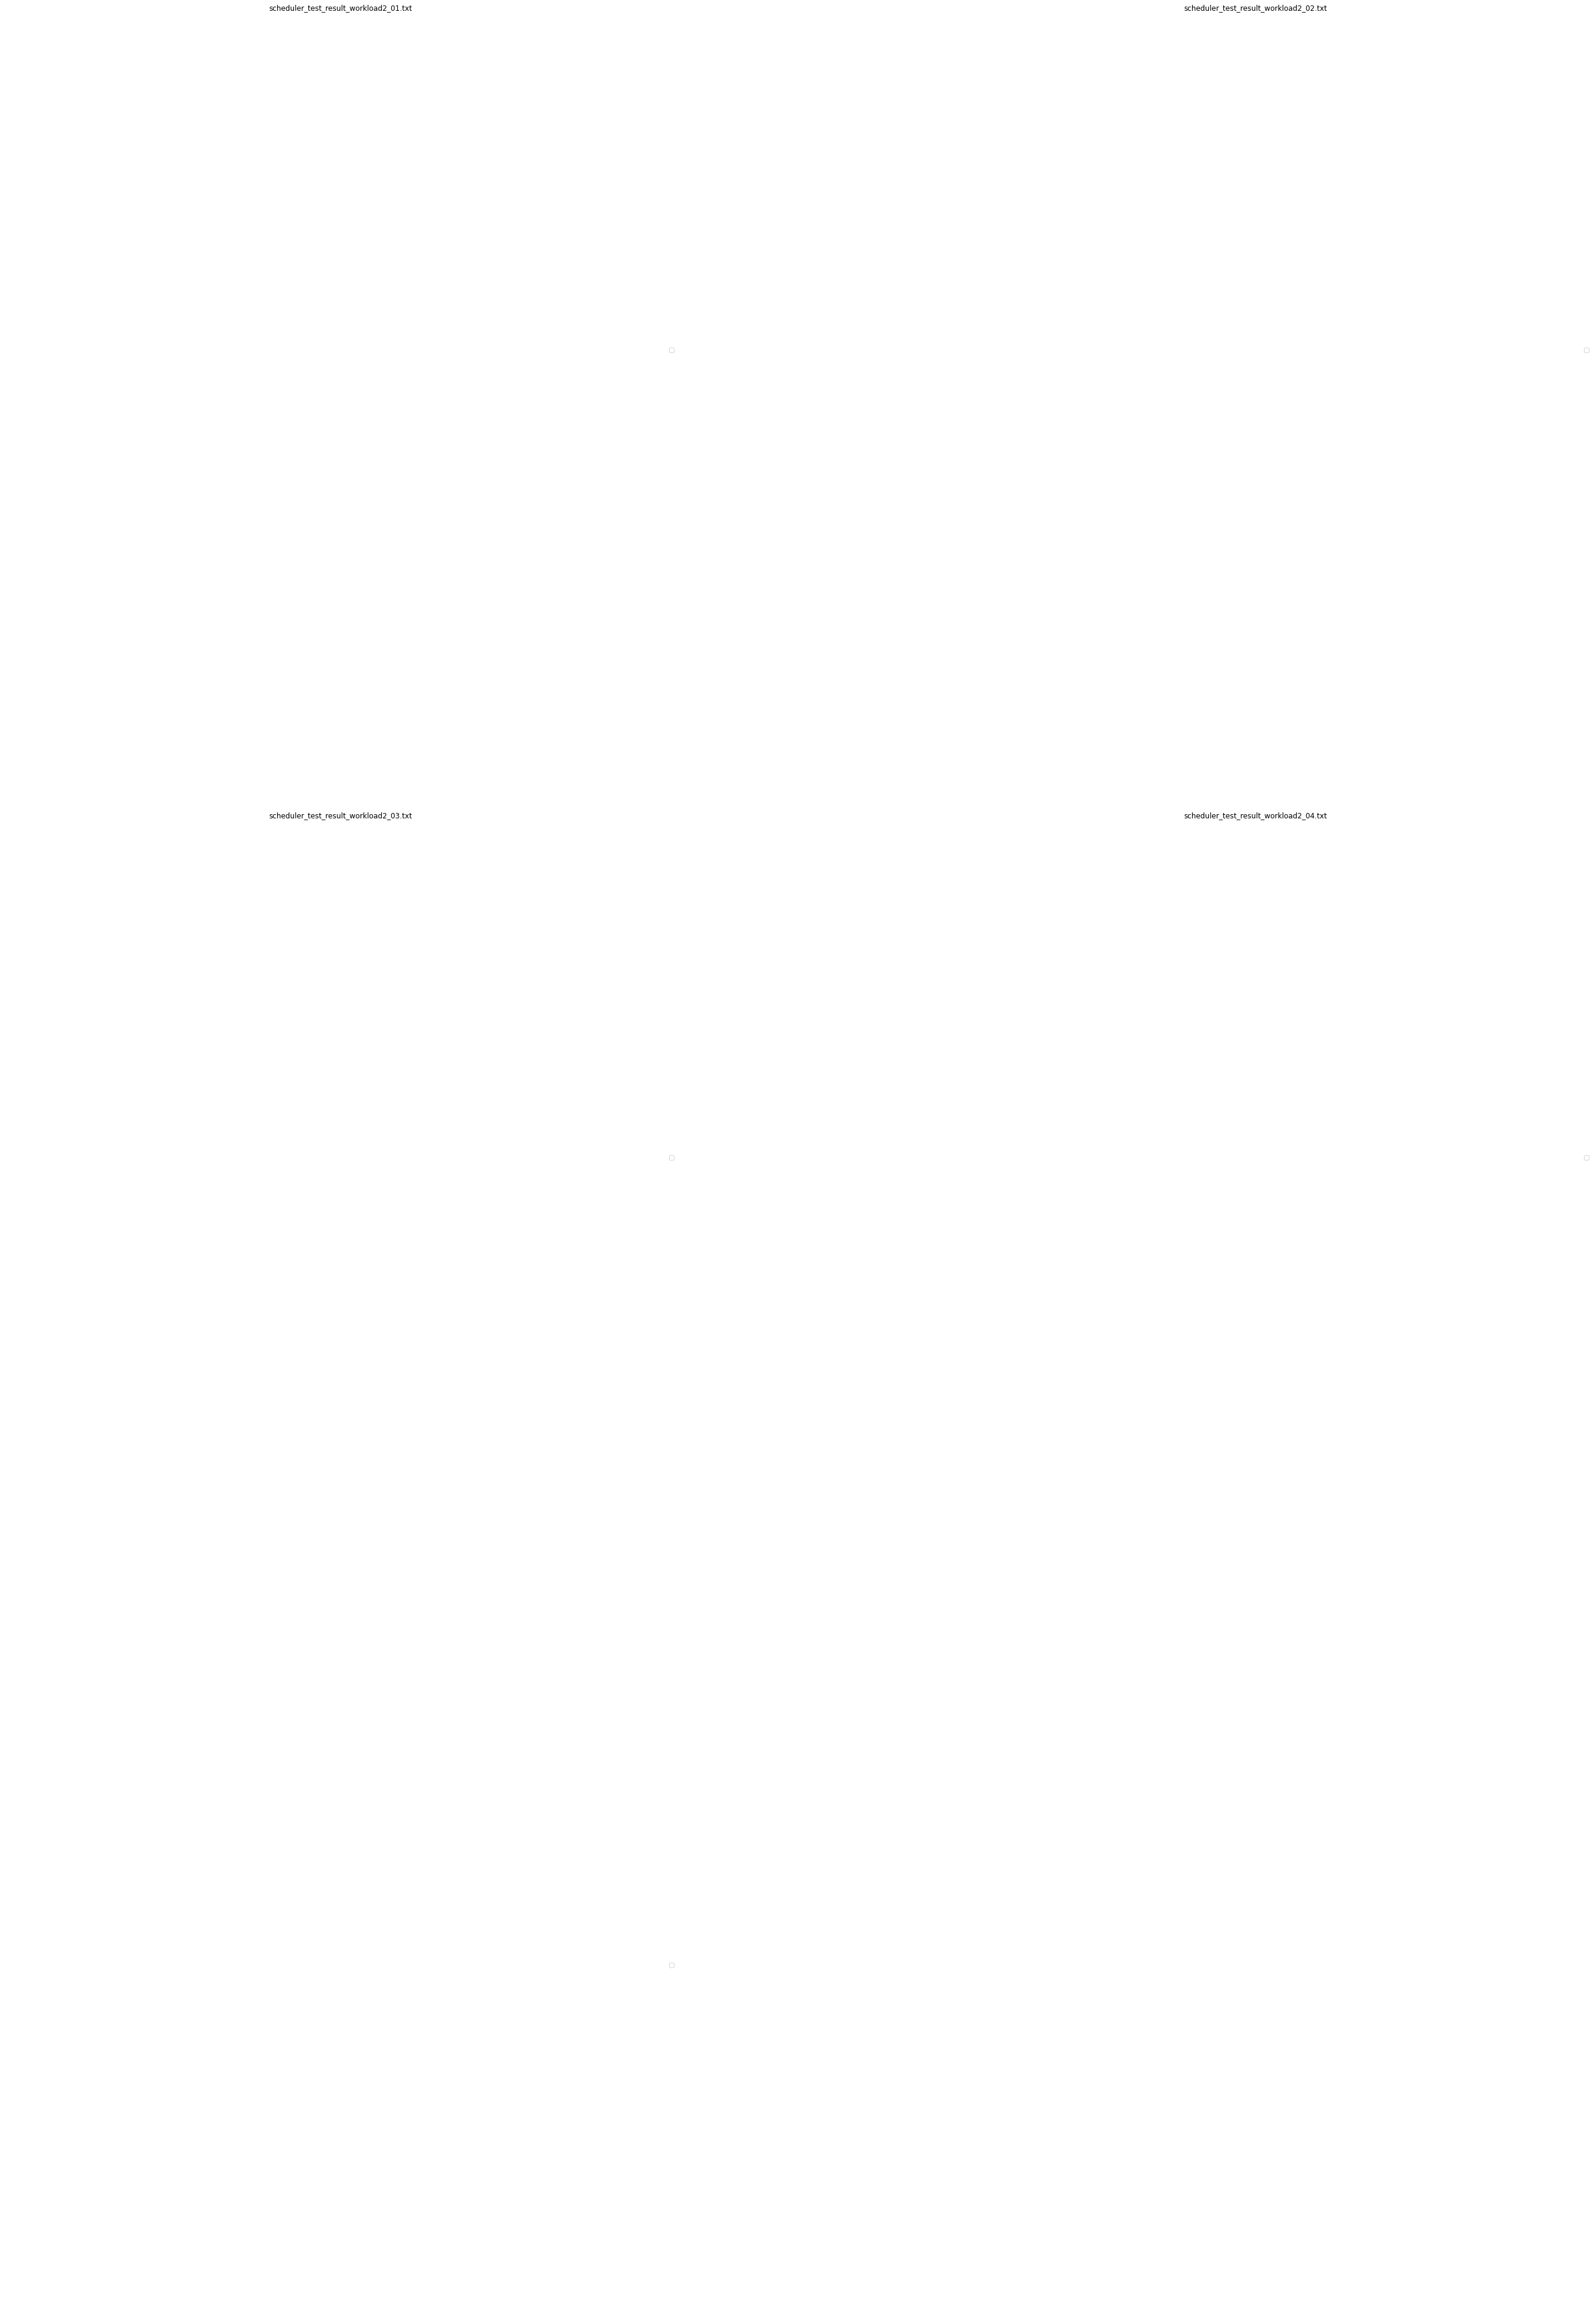

----------3----------


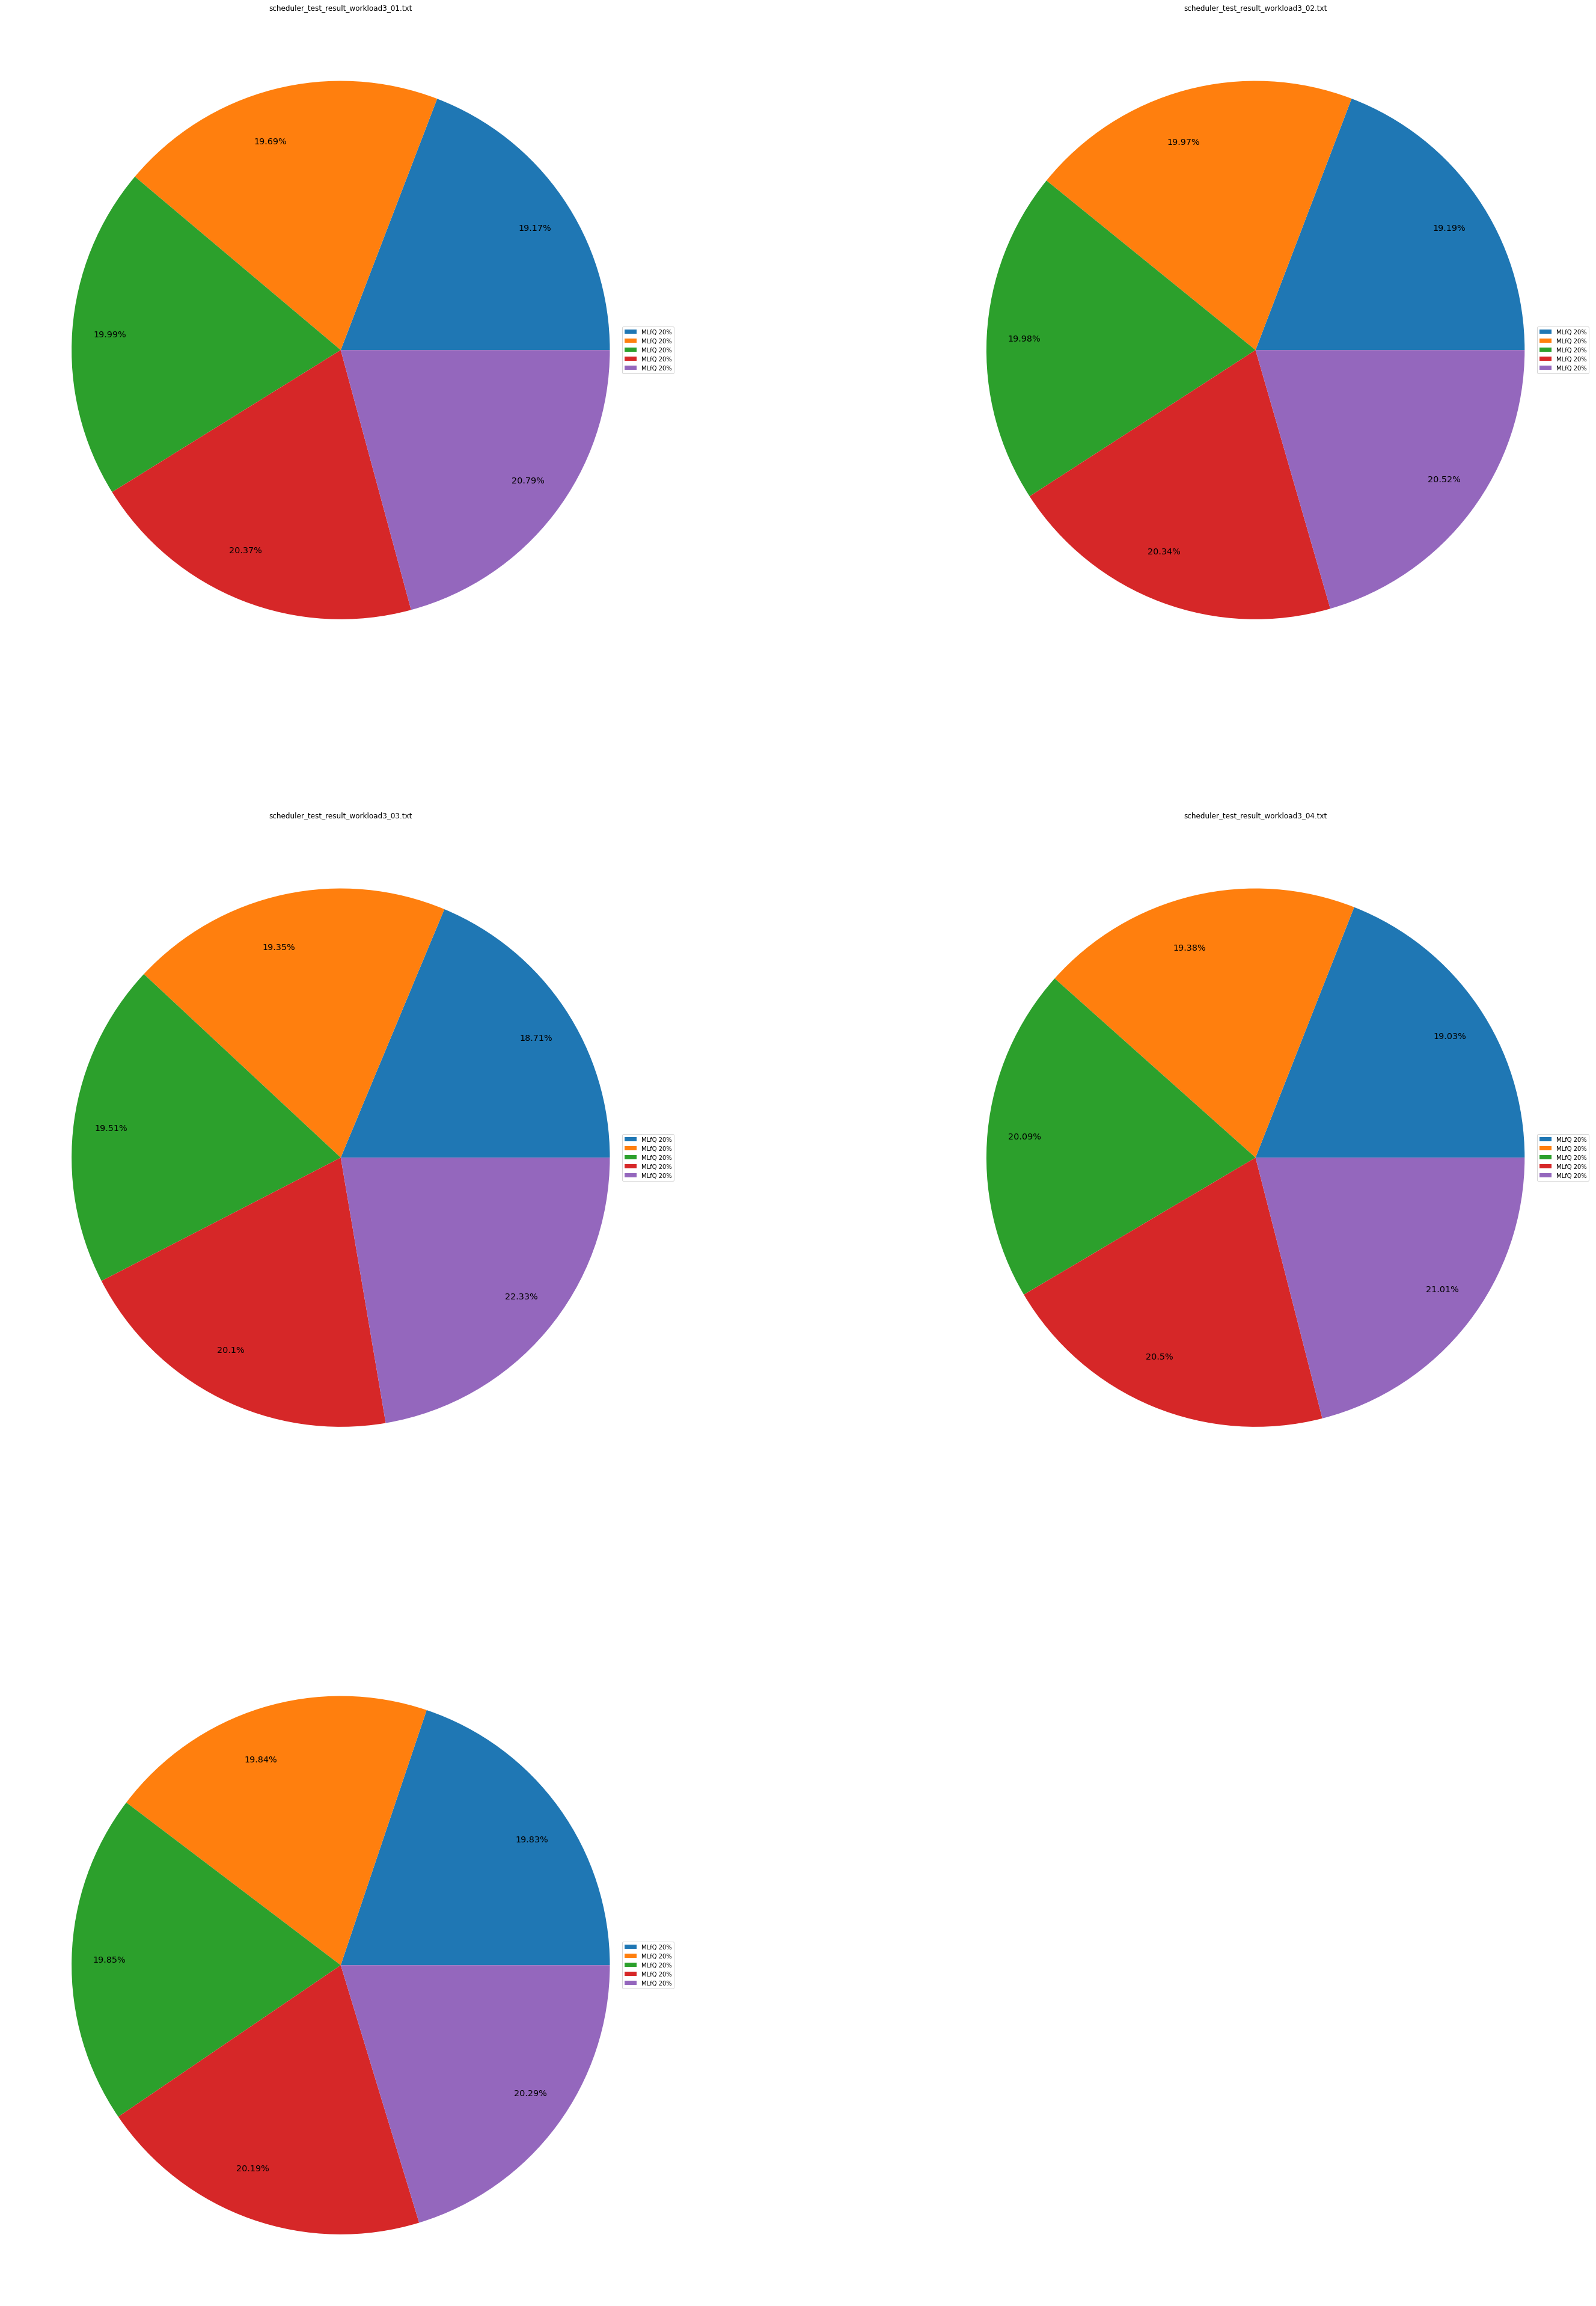

----------4----------


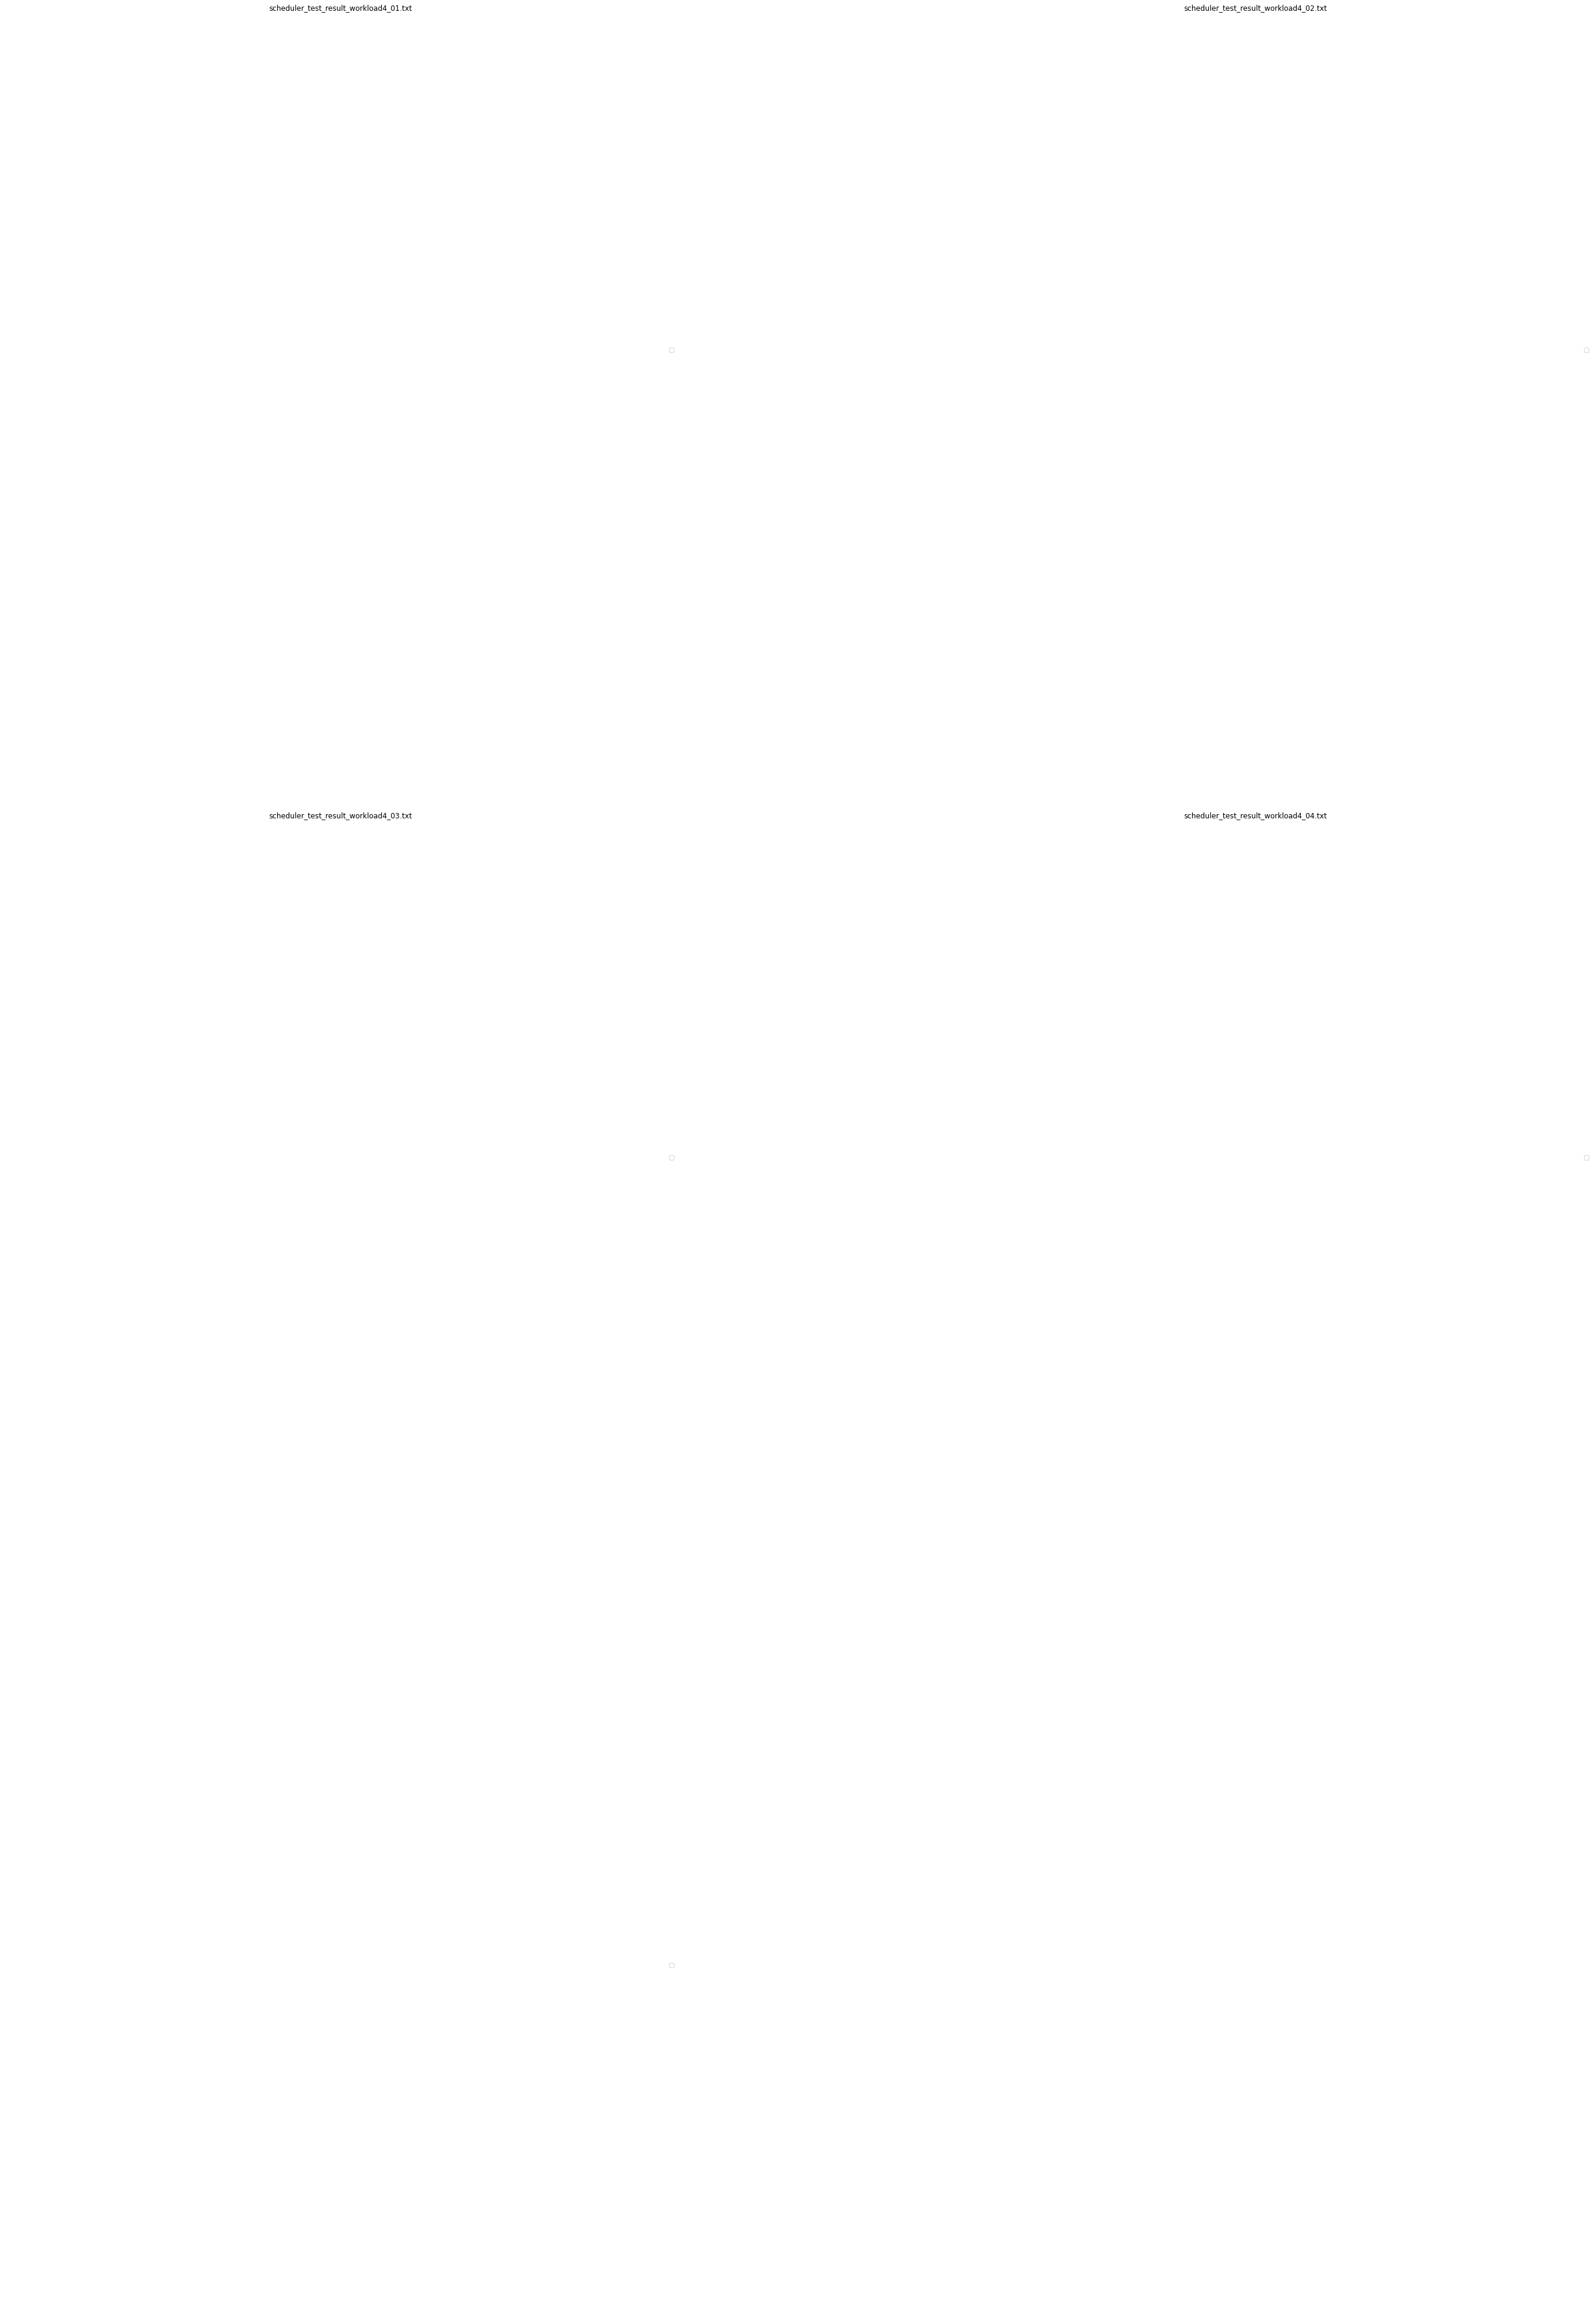

----------5----------


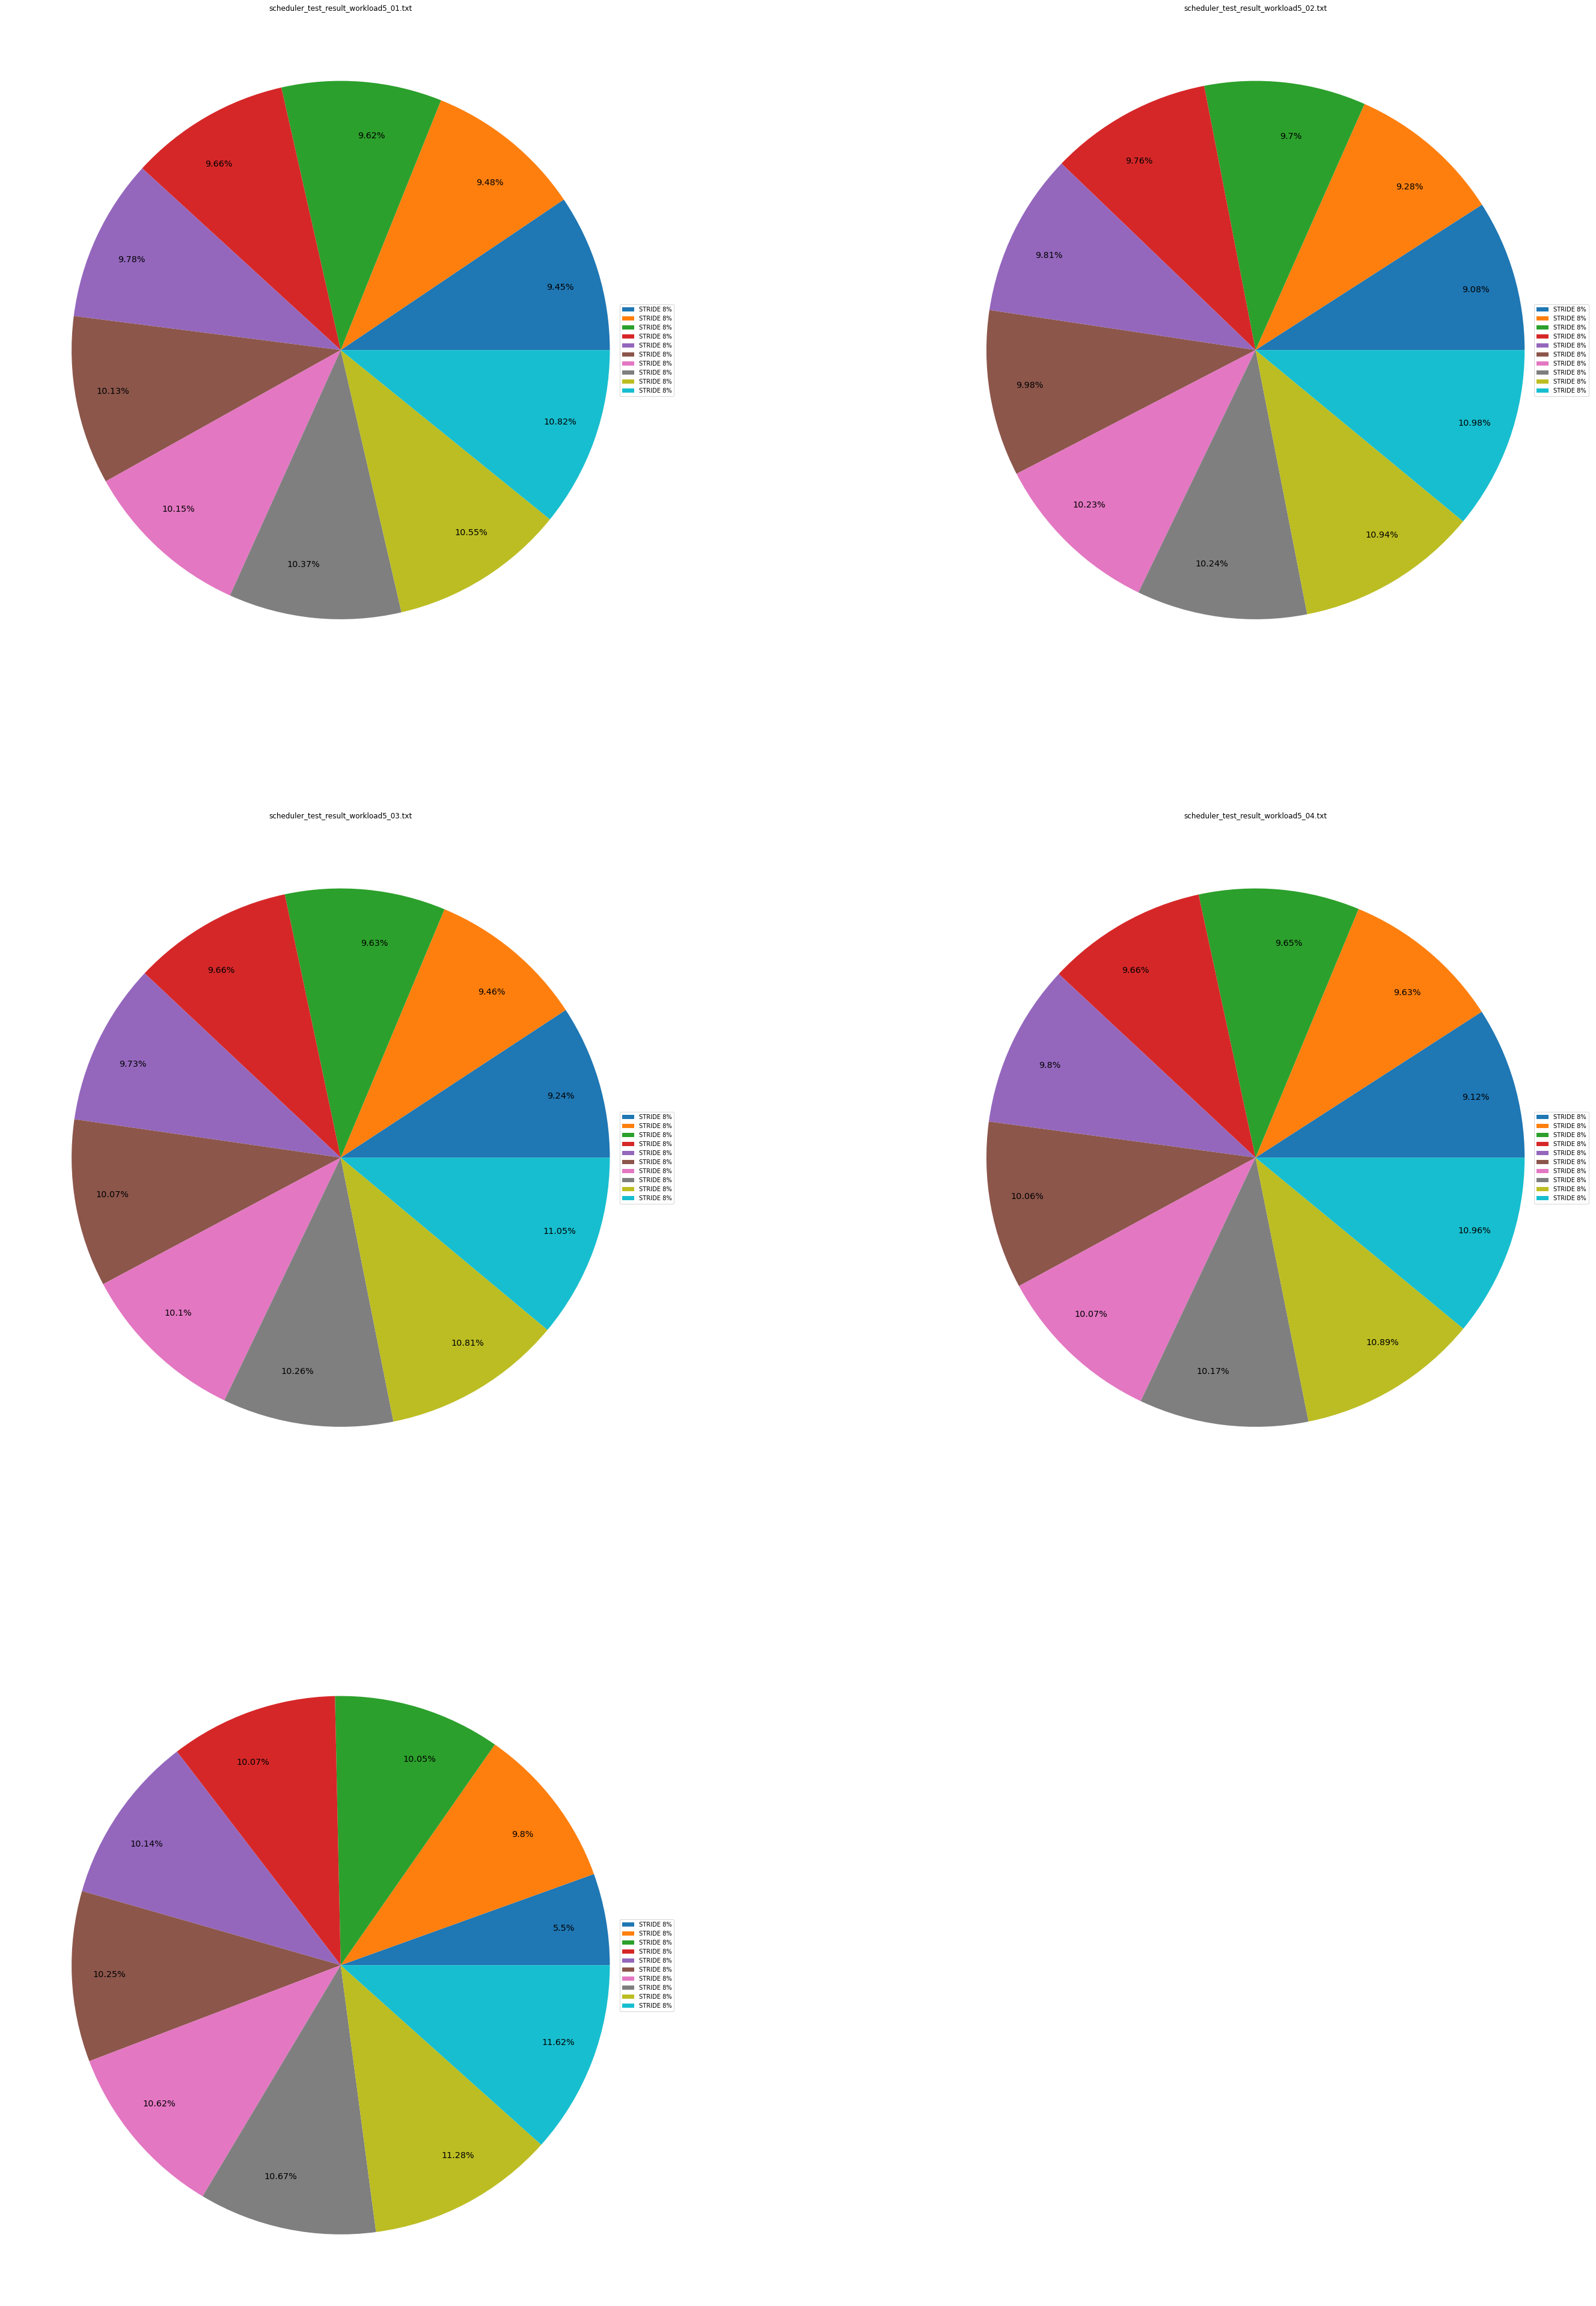

----------6----------


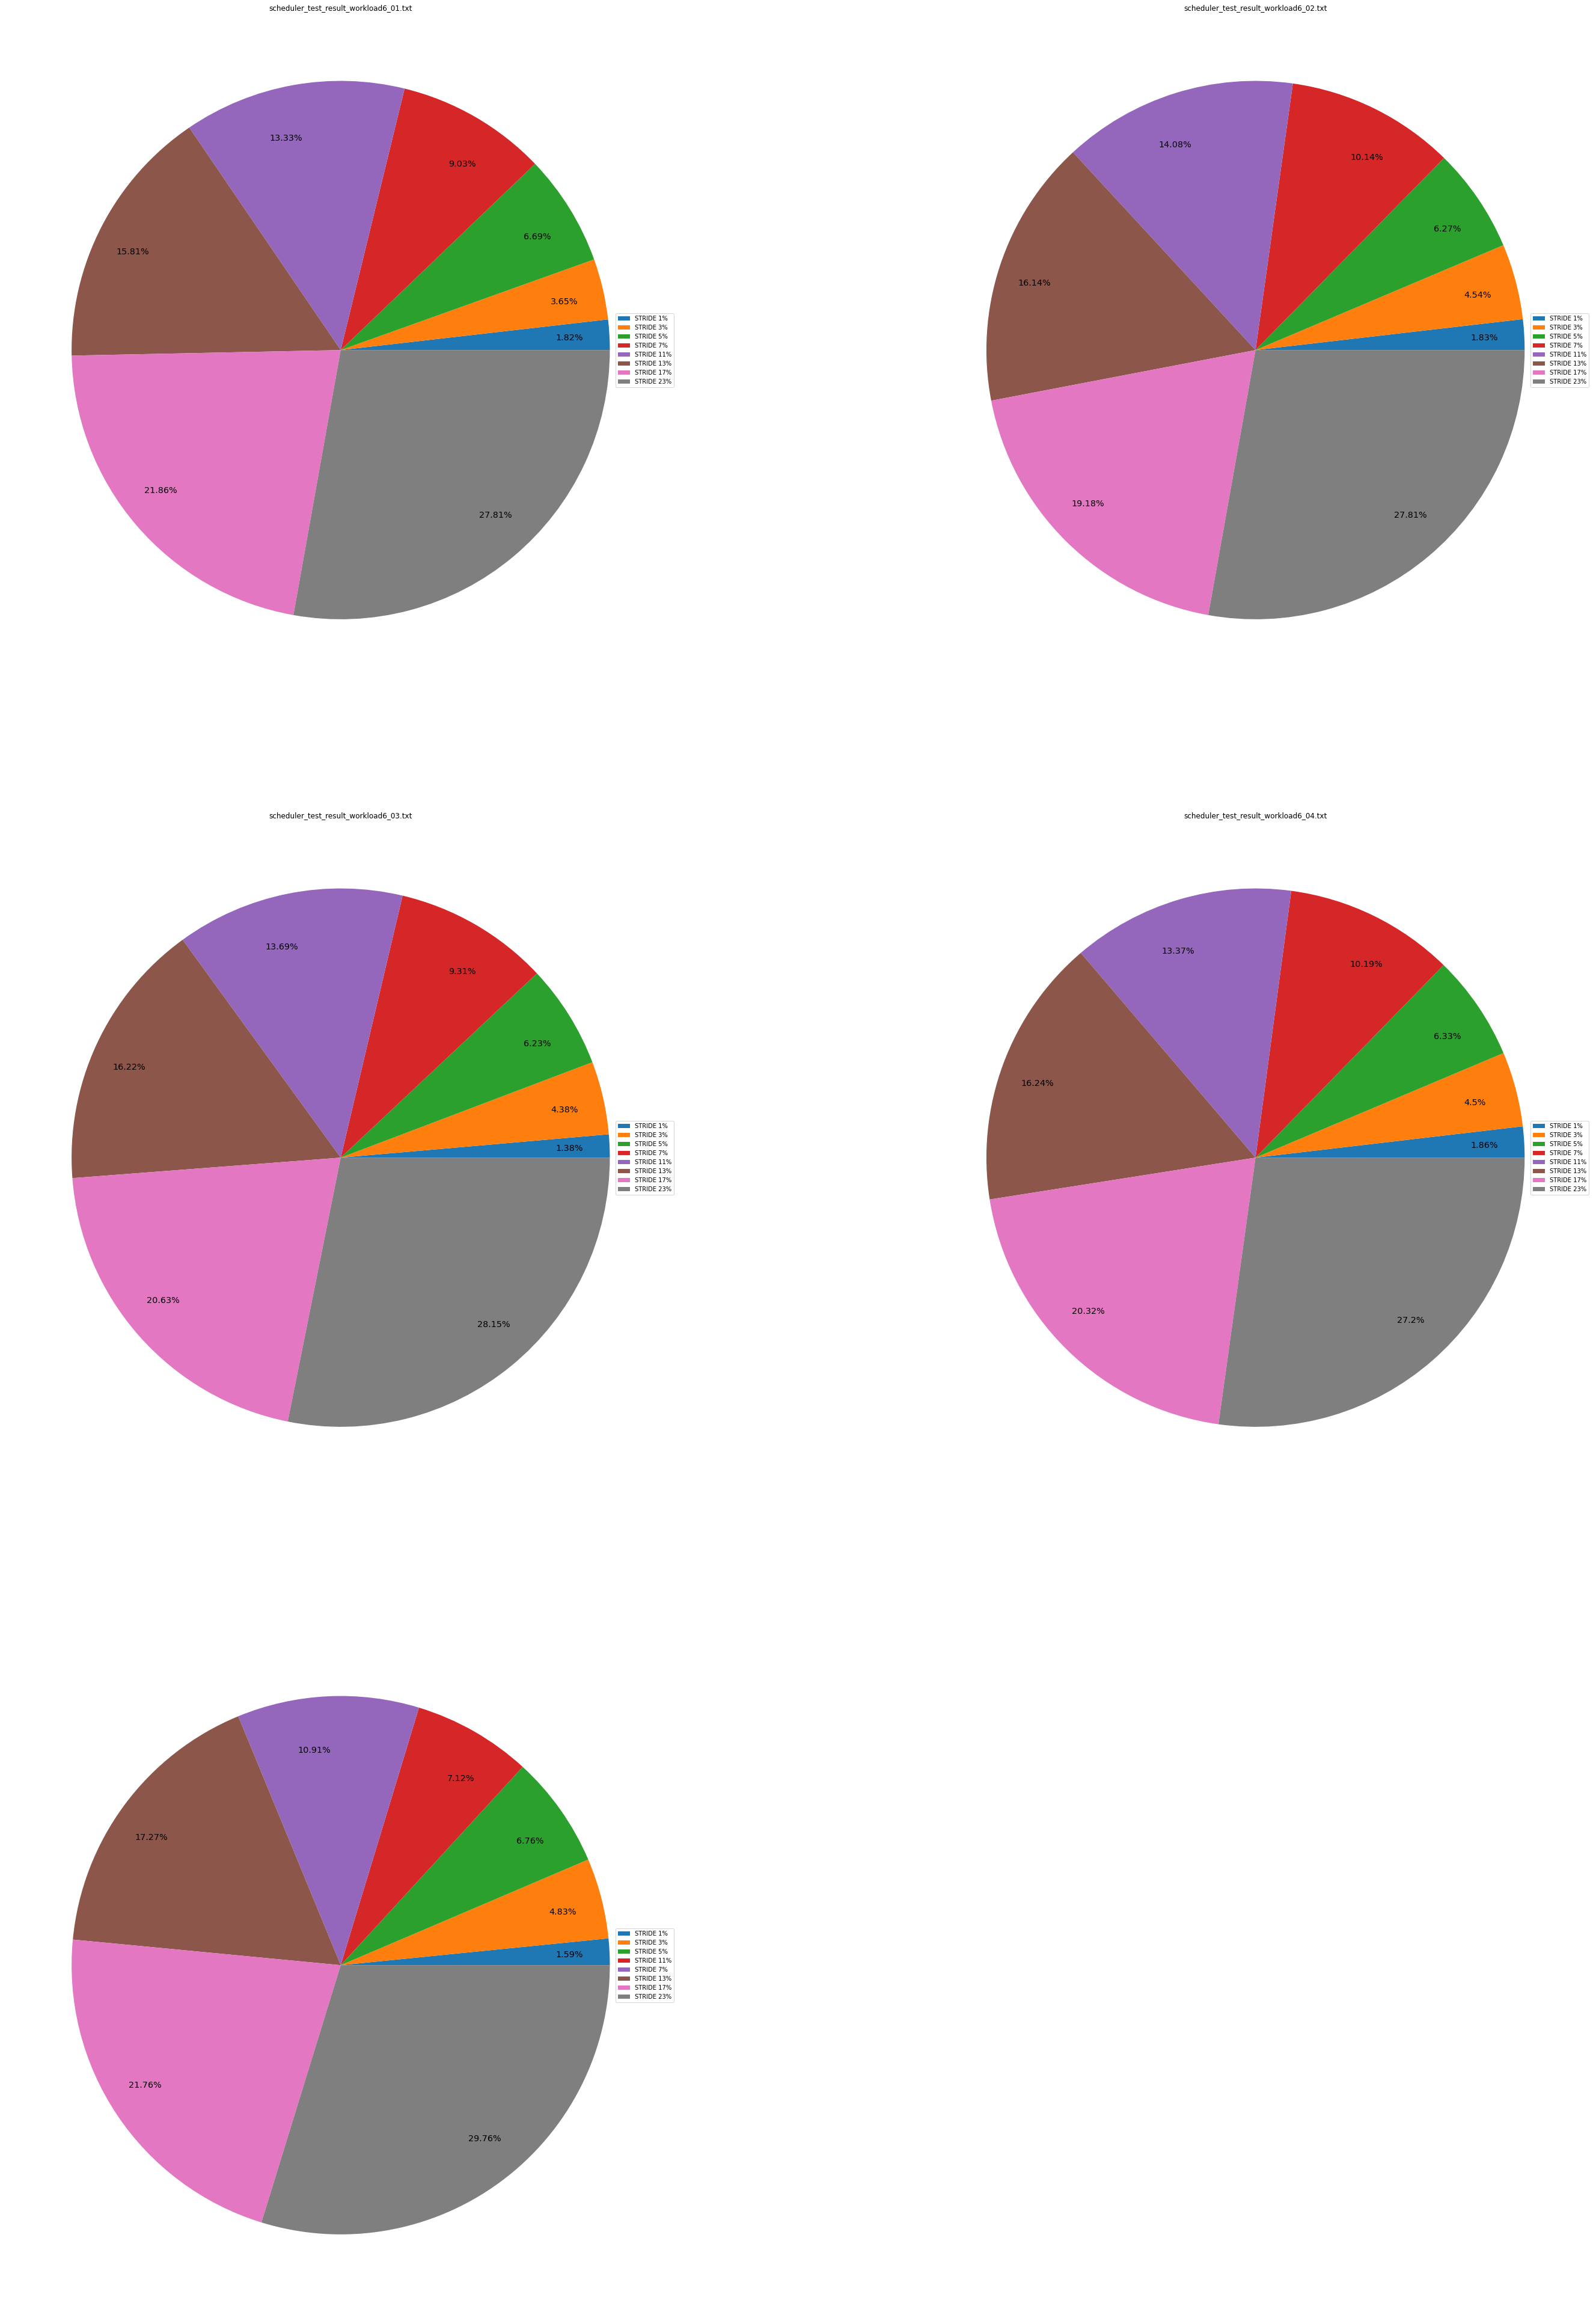

----------7----------


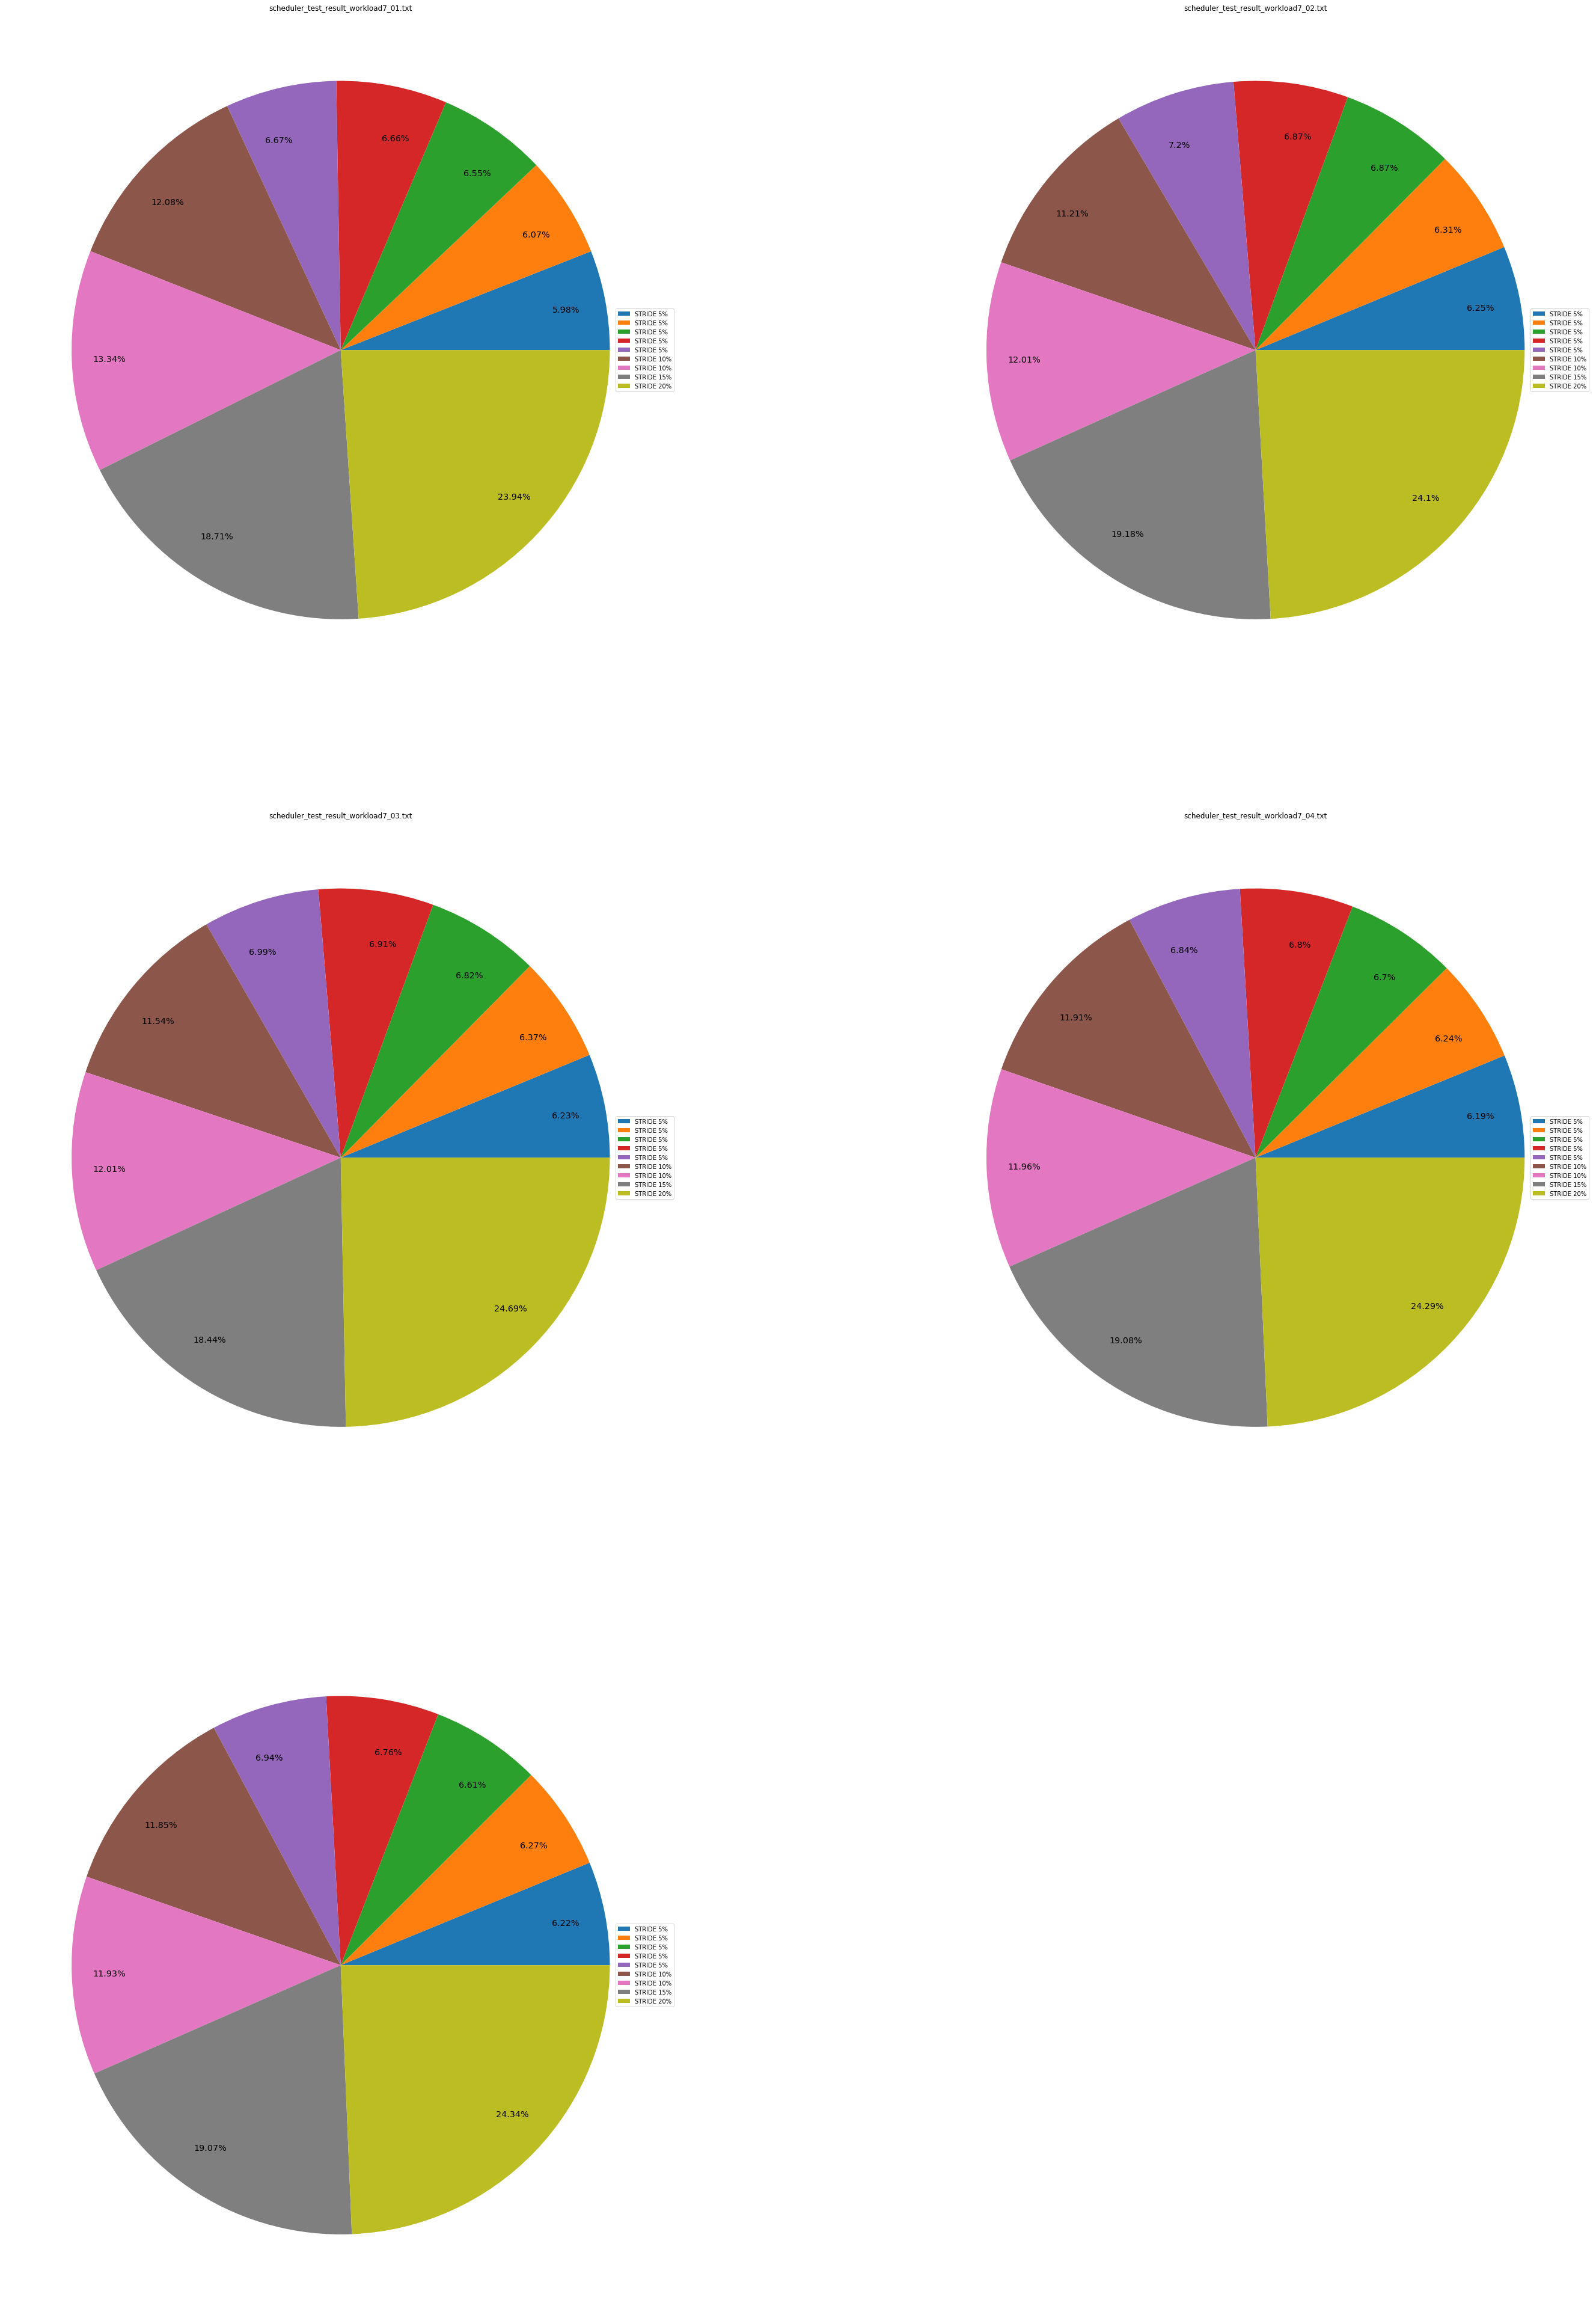

----------8----------


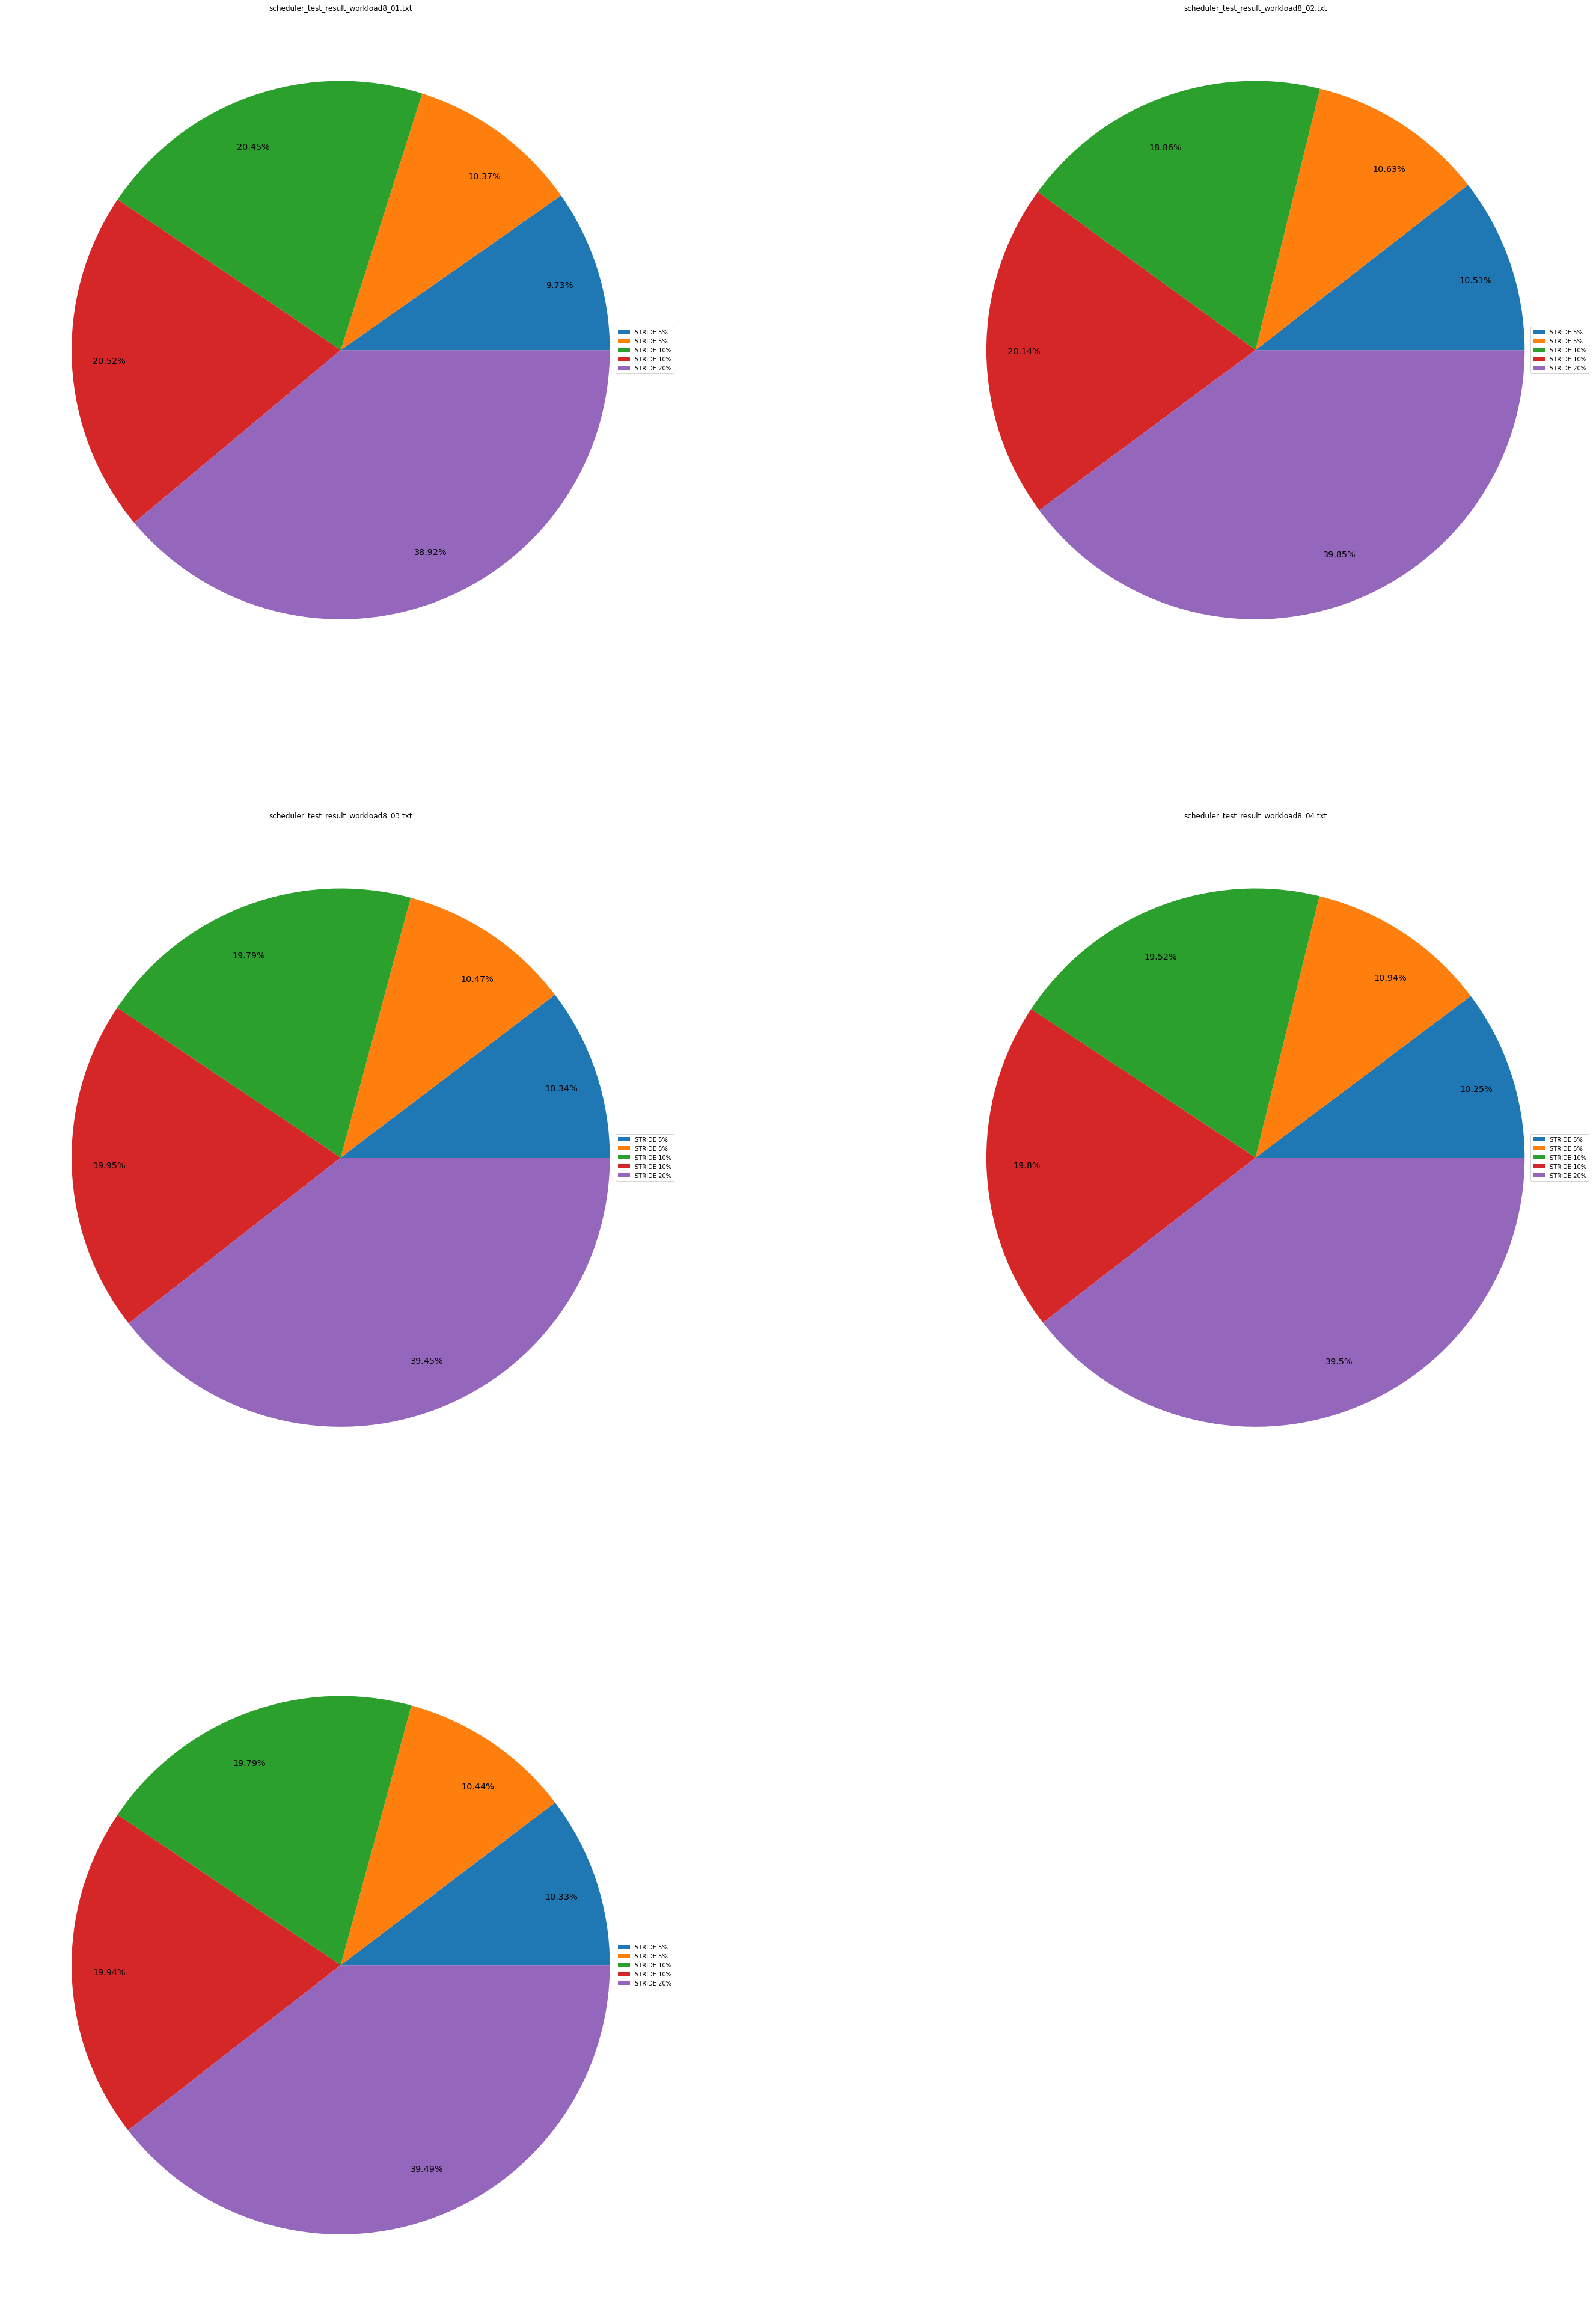

----------9----------


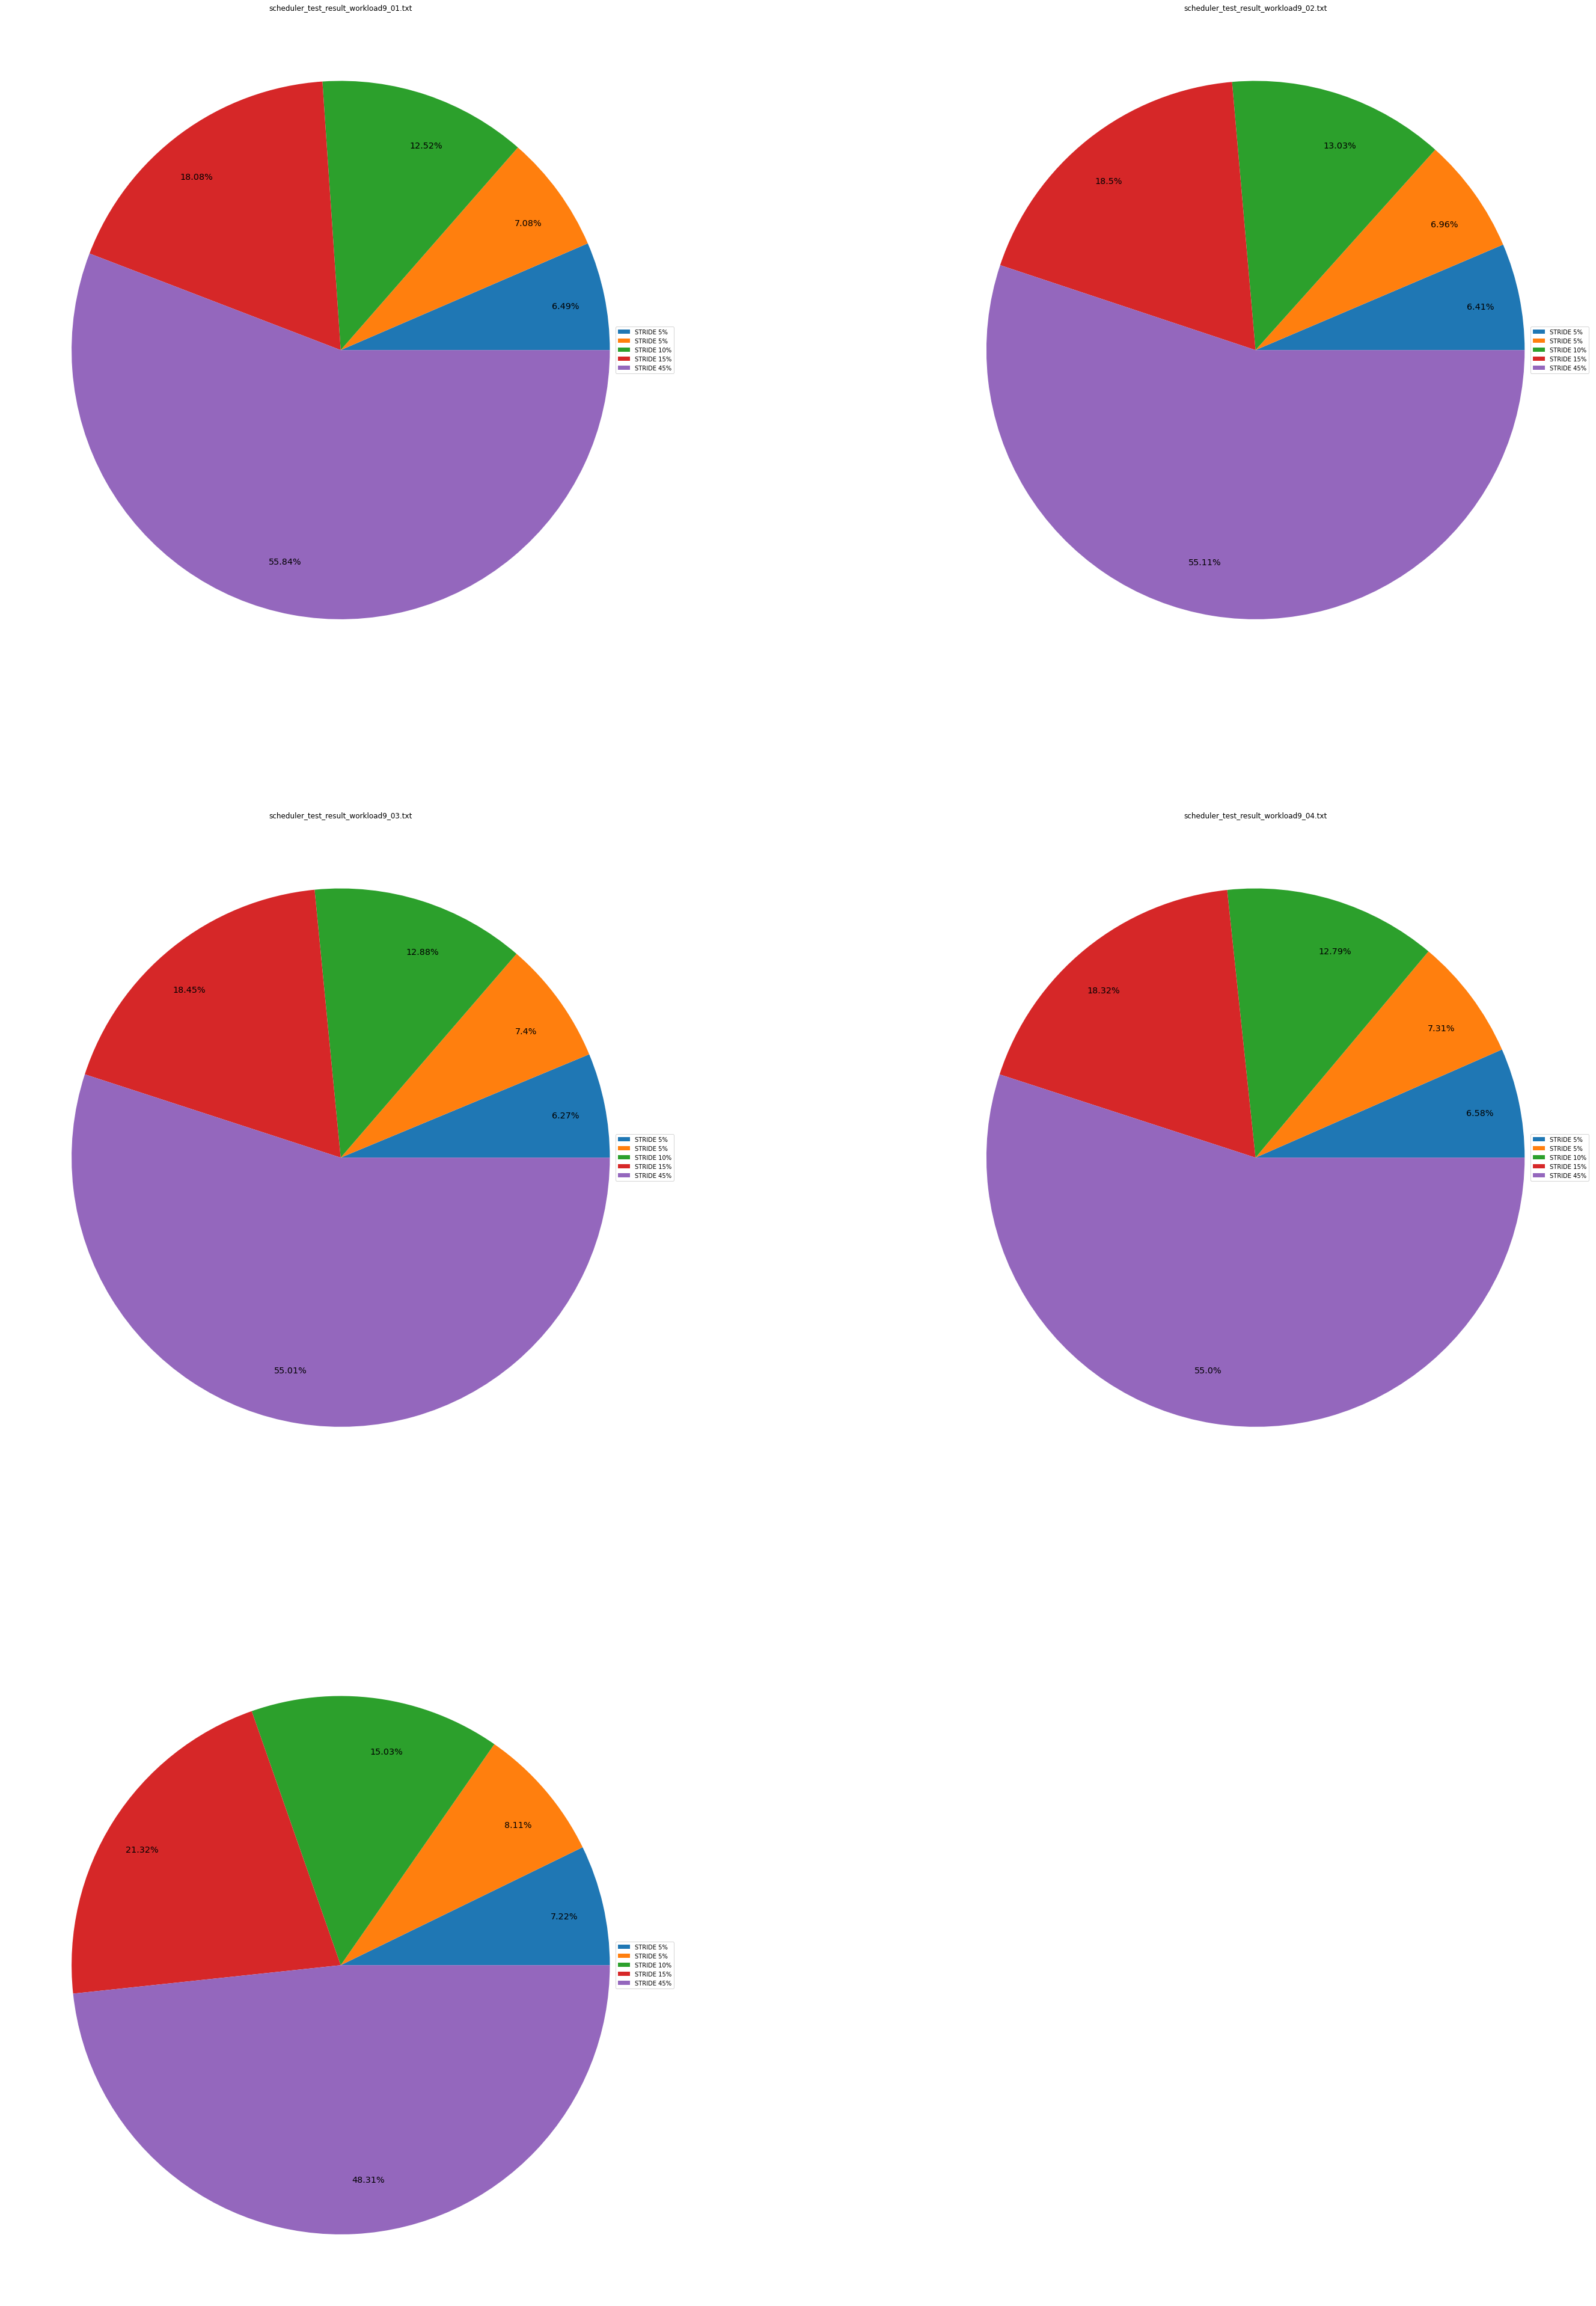

In [7]:
for idx in range(10):
    print("-"*10+str(idx)+"-"*10)
    plot_workload(idx)